# Bank Loan case study

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [18]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [19]:
pd.options.display.max_rows = 500

## Currnet Application


In [20]:
df_current_application = pd.read_csv("application_data.csv")
df_current_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE   
0         351000.0   Unaccompanied          Working  \
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
0  Secondary / secondary special  Single / not married  House / apartment  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION   
0                    0.018801       -9461           -637            -3648.0  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE   
0            -2120          NaN           1               1                0  \
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS   
0                 1           1           0        Laborers              1.0  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY   
0                     2                            2  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START   
0                  WEDNESDAY                       10  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION   
0                           0                           0  \
1                           0                           0   
2                        

In [21]:
df_current_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [22]:
df_current_application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL   
count  307511.000000  307511.000000  307511.000000      3.075110e+05  \
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE   
count  3.075110e+05  307499.000000     3.072330e+05  \
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED   
count               307511.000000  307511.000000  307511.000000  \
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL   
count      307511.000000    307511.000000  104582.000000  307511.000000  \
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE   
count   307511.000000    307511.000000     307511.000000  307511.000000  \
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT   
count  307511.000000    307509.000000         307511.000000  \
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START   
count                307511.000000            307511.000000  \
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

#### Handling Null values in columns 

In [23]:
# count Null value columnwise
df_current_application.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Find the percentage missing values for the columns

In [24]:
# calculating null values
def column_wise_percentage_null(df_current_application):
    output = round(100*(df_current_application.isnull().sum()/len(df_current_application.index)),2)
    return output

In [25]:
# Get percentage missing values of all columns
Null_col = column_wise_percentage_null(df_current_application)
Null_col

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

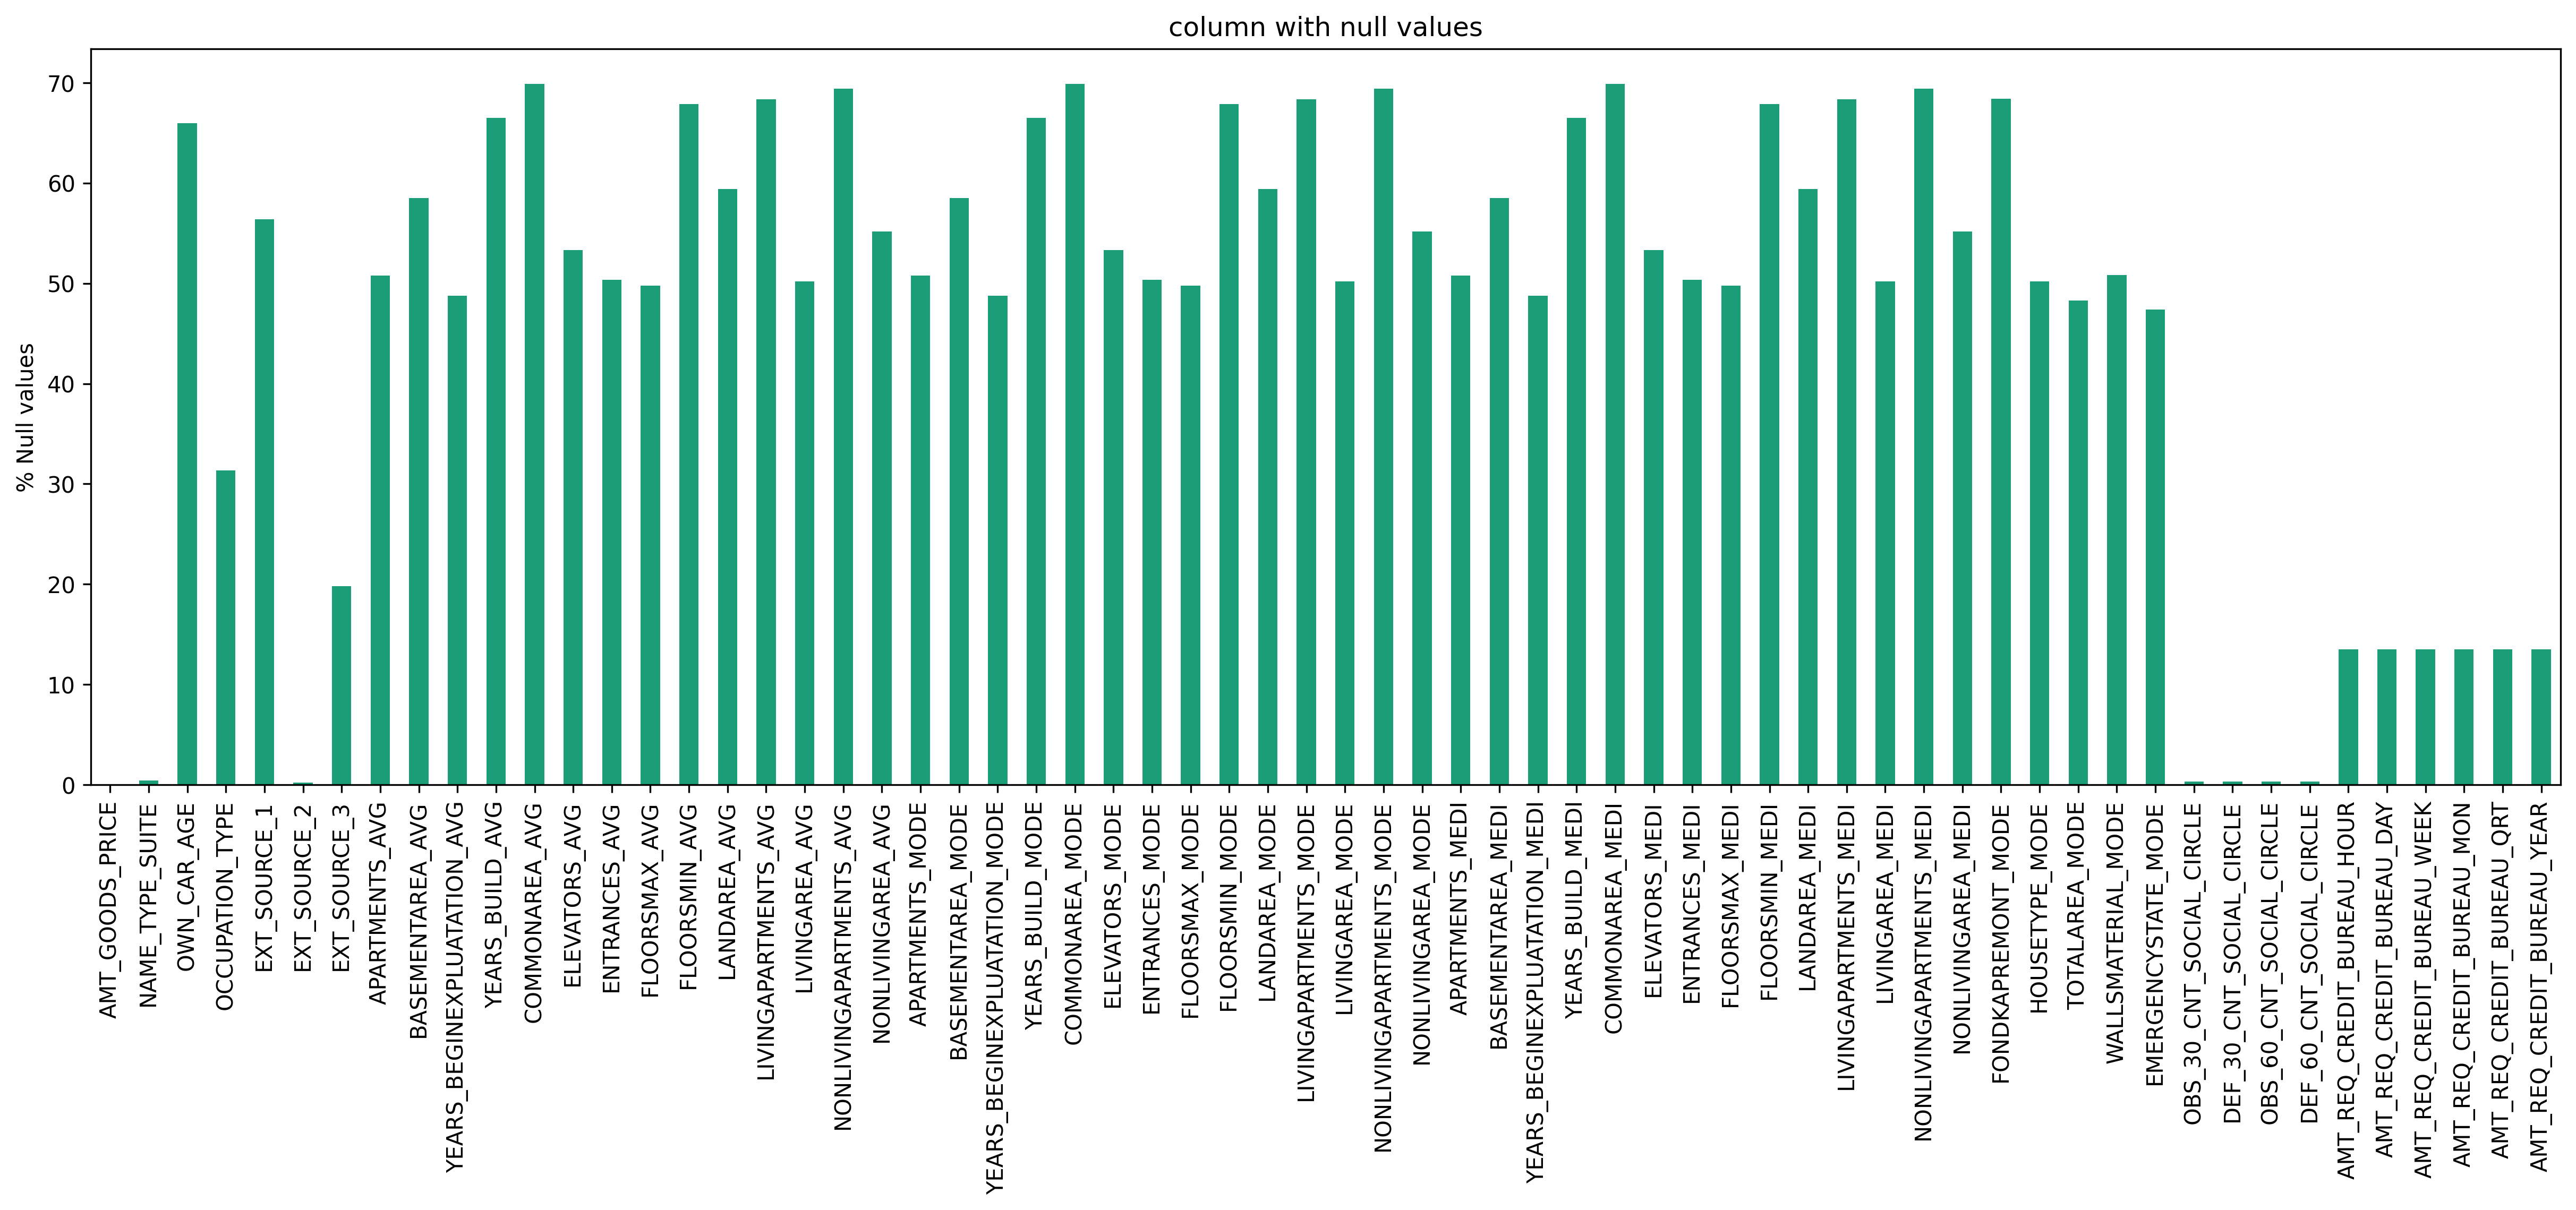

In [26]:
# Identifying the coluns with null values
Null_col = Null_col[Null_col>0]

# Graphical representation of column with their percentage null values
plt.figure(figsize= (20,6), dpi=300)
Null_col.plot(kind = "bar",cmap='Dark2')
plt.title("column with null values")
plt.ylabel("% Null values")
plt.show()

In [27]:
# List the columns having more than 25 percent missing value
colomns_25_missing_values = Null_col[Null_col> 25]
colomns_25_missing_values

OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MOD

In [28]:
#Removing the columns having more than 25% missing values
df_current_application = df_current_application.drop(colomns_25_missing_values.index, axis=1)
df_current_application.shape

(307511, 72)

In [29]:
df_current_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

List and delete the columns, which are not much relevant for the analysis

In [30]:
cols_irrelevant = ["DAYS_REGISTRATION","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE",
                   "FLAG_PHONE","FLAG_EMAIL","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","LIVE_REGION_NOT_WORK_REGION",
                   "REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","DAYS_LAST_PHONE_CHANGE",
                  "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE",
                  "NAME_TYPE_SUITE"]
cols_irrelevant

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [31]:
### Removing the columns which are irrelevant for the analysis
df_current_application = df_current_application.drop(cols_irrelevant,axis=1)

In [32]:
df_current_application.shape

(307511, 53)

In [33]:
# Columns after dropping the irrelevant columns
df_current_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCU

#### Treating missing values in rows

In [34]:
# Count the number of rows that have more than 45% missing values
len(df_current_application[df_current_application.isnull().sum(axis=1) > (len(df_current_application.columns)//1.81)].index)

0

As there are none of the rows that have more than 45% value missing, we won"t be deliting rows based on this.

In [35]:
## Count the rows for which EXT_SOURCE_2 and EXT_SOURCE_3 both are empty
len(df_current_application[np.isnan(df_current_application["EXT_SOURCE_2"]) & np.isnan(df_current_application["EXT_SOURCE_3"])])

230

In [36]:
# As there are only 230 such records we can delete those.
# As we have total of 307511 records deleting only 230 record will not affect our further analysis
df_current_application = df_current_application[(~(np.isnan(df_current_application["EXT_SOURCE_2"]) & np.isnan(df_current_application["EXT_SOURCE_3"])))]

In [37]:
# Comparing EXT_SOURCE_2 and EXT_SOURCE_3 columns
round(df_current_application.loc[:, ["EXT_SOURCE_2", "EXT_SOURCE_3"]].describe(),3)

EXT_SOURCE_2  EXT_SOURCE_3
count    306851.000    246546.000
mean          0.514         0.511
std           0.191         0.195
min           0.000         0.001
25%           0.392         0.371
50%           0.566         0.535
75%           0.664         0.669
max           0.855         0.896

We can see that the difference between mean anad median is quite narrow for both columns. Also, the variations from 25th to 75th Percentile is qually distributed. Thus, let's impute the missing values by the mean value of EXT_SOURCE_2 & EXT_SOURCE_3 respectively.

In [38]:
## Imputing EXT_SOURCE_2 & EXT_SOURCE_3 with mean values
df_current_application.loc[np.isnan(df_current_application["EXT_SOURCE_2"]),["EXT_SOURCE_2"]] = df_current_application["EXT_SOURCE_2"].mean()
df_current_application.loc[np.isnan(df_current_application["EXT_SOURCE_3"]),["EXT_SOURCE_3"]] = df_current_application["EXT_SOURCE_3"].mean()

In [39]:
round(100*(df_current_application.isnull().sum()/len(df_current_application.index)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.00
EXT_SOURCE_3                    0.00
F

In [40]:
# Treating missing values in AMT_GOODS_PRICE
df_current_application["AMT_GOODS_PRICE"].describe().apply(lambda x: "%.2f" % x)

count     307004.00
mean      538484.20
std       369486.08
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

<Axes: >

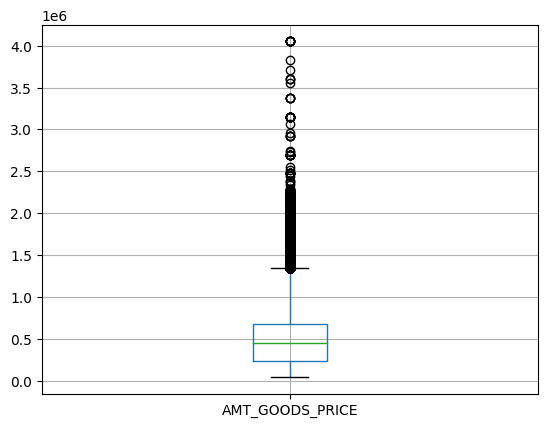

In [41]:
df_current_application.boxplot(column=["AMT_GOODS_PRICE"])

We see the standard deviation of AMT_GOODS_PRICE is very high. Also there are good amount of outliers in the column as well. So, imputing values with the mean or median will be biased in this case. Hence, it"s better to remove the rows with missing AMT_GOODS_PRICE. Infact these rows are only 009% of the whole records.

In [42]:
df_current_application = df_current_application[~np.isnan(df_current_application["AMT_GOODS_PRICE"])]

We have 5 columns for the number of enquiries to Credit Bureau about the client. It doesn't make sense to count the number for a very short of time such as an hour or a day or a week before the application date. On the other hand it also makes lesser sense if we count the number for a very long period of time. Hence, it'll be feasible for us if we take the counter for a quater, which is not too short or too long time period. So, we have to do two things now:-

1. We'll handle the missing data for the column AMT_REQ_CCREDIT_BUREAU_QRT.
2. We'll delete the column for the count of hour,day,week, month & year.

In [43]:
# Handling AMT_REQ_CREDIT_BUREAU_QRT
df_current_application["AMT_REQ_CREDIT_BUREAU_QRT"].describe()

count    265662.000000
mean          0.265552
std           0.794315
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

This is an integer type variable & thus have value 0, 1, 2 etc. We cannot impute the NaNs by the mean or median(1.53 enquiries doesn"t make sense!). Thus, we need to impute them by the mode - the most common occuring value if that approach is feasible.

In [44]:
## Converting AMT_REQ_CREDIT_BUREAU_QRT to "Catagory"
df_current_application["AMT_REQ_CREDIT_BUREAU_QRT"] = df_current_application["AMT_REQ_CREDIT_BUREAU_QRT"].astype("category")

# frequencies of each categories
df_current_application["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215133
1.0       33836
2.0       14393
3.0        1716
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: count, dtype: int64

The most common value of AMT_REQ_CREDIT_BUREAU_QRT is 0, let"s impute the NaNs by that.

In [45]:
# Imputing AMT_REQ_CREDIT_BUREAU_QRT with 0
df_current_application.loc[pd.isnull(df_current_application["AMT_REQ_CREDIT_BUREAU_QRT"]), ["AMT_REQ_CREDIT_BUREAU_QRT"]] = 0

In [46]:
# Removing AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR
df_current_application = df_current_application.drop(["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_YEAR"],axis=1)

In [47]:
round(100*(df_current_application.isnull().sum()/len(df_current_application.index)),2)


SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_ID_PUBLISH                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3     

We now have a dataframe with no missing values. Let"s finally look at how many rows we have lost in the process. At the beginning we had 307511 rows.

In [48]:
df_current_application.shape

(307004, 48)

In [49]:
# Percentage of dropped rows
(100 - 100*(len(df_current_application.index)/307511))

0.16487215091493113

We have dropped 0.16% rows from entire data in cleaning process

### Converting DAYS_BIRTH column into AGE column for readability and analysis

In [50]:
# Divide "DAYS_BIRTH" by 365 for calculating Age
df_current_application["AGE"] = abs(df_current_application["DAYS_BIRTH"]//365)

In [51]:
# Drop "DAYS_BIRTH" column
df_current_application = df_current_application.drop(["DAYS_BIRTH"],axis=1)

### Converting DAYS_EMPLOYED column into YEARS_EMPLOYED column for readability & analysis

In [52]:
# Divide "DAYS_EMPLOYED" by 365 for YEAR_EMPLOYED
df_current_application["YEARS_EMPLOYED"] = abs(df_current_application["DAYS_EMPLOYED"]//365)

In [53]:
# Drop "DAYS_EMPLOYED" column
df_current_application = df_current_application.drop(["DAYS_EMPLOYED"],axis=1)

In [54]:
df_current_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE   
0         351000.0          Working  Secondary / secondary special  \
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   
0  Single / not married  House / apartment                    0.018801  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT   
0            -2120              1.0                     2  \
1             -291              2.0                     1   
2            -2531              1.0                     2   
3            -2437              2.0                     2   
4            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION   
0                            2                           0  \
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  EXT_SOURCE_2   
0                           0  Business Entity Type 3      0.262949  \
1                           0                  School      0.622246   
2                           0              Government      0.555912   
3                           0  Business Entity Type 3      0.650442   
4                           0                Religion      0.322738   

   EXT_SOURCE_3  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4   
0      0.139376                0                1                0  \
1      0.510853                0                1                0   
2      0.729567                0                0                0   
3      0.510853                0                1                0   
4      0.510853                0                0                0   

   FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8   
0                0                0                0                0  \
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                1   

   FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12   
0                0                 0                 0                 0  \
1                0                 0                 0                 0  

### Removing outliers

In [55]:
# Finding outliers in all the numerical columns with 1.5 IQR rule & removing the outlier records
column_ourlier_list = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","AGE"]
for col in col_ourlier_list:
    q1 = df_current_application[col].quantile(0.25)
    q3 = df_current_application[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_current_application = df_current_application.loc[(df_current_application[col] > range_low) & (df_current_application[col] < range_high)]

df_current_application.shape

NameError: name 'col_ourlier_list' is not defined

In [ ]:
# Percentage of rows lost
round((100 - 100*(len(df_current_application.index)/307511)),2)

Though we lost around 10% rows in the outliers handling process, we got rid of the outliers for the fair analysis of the data.

## Checking Data Imbalance

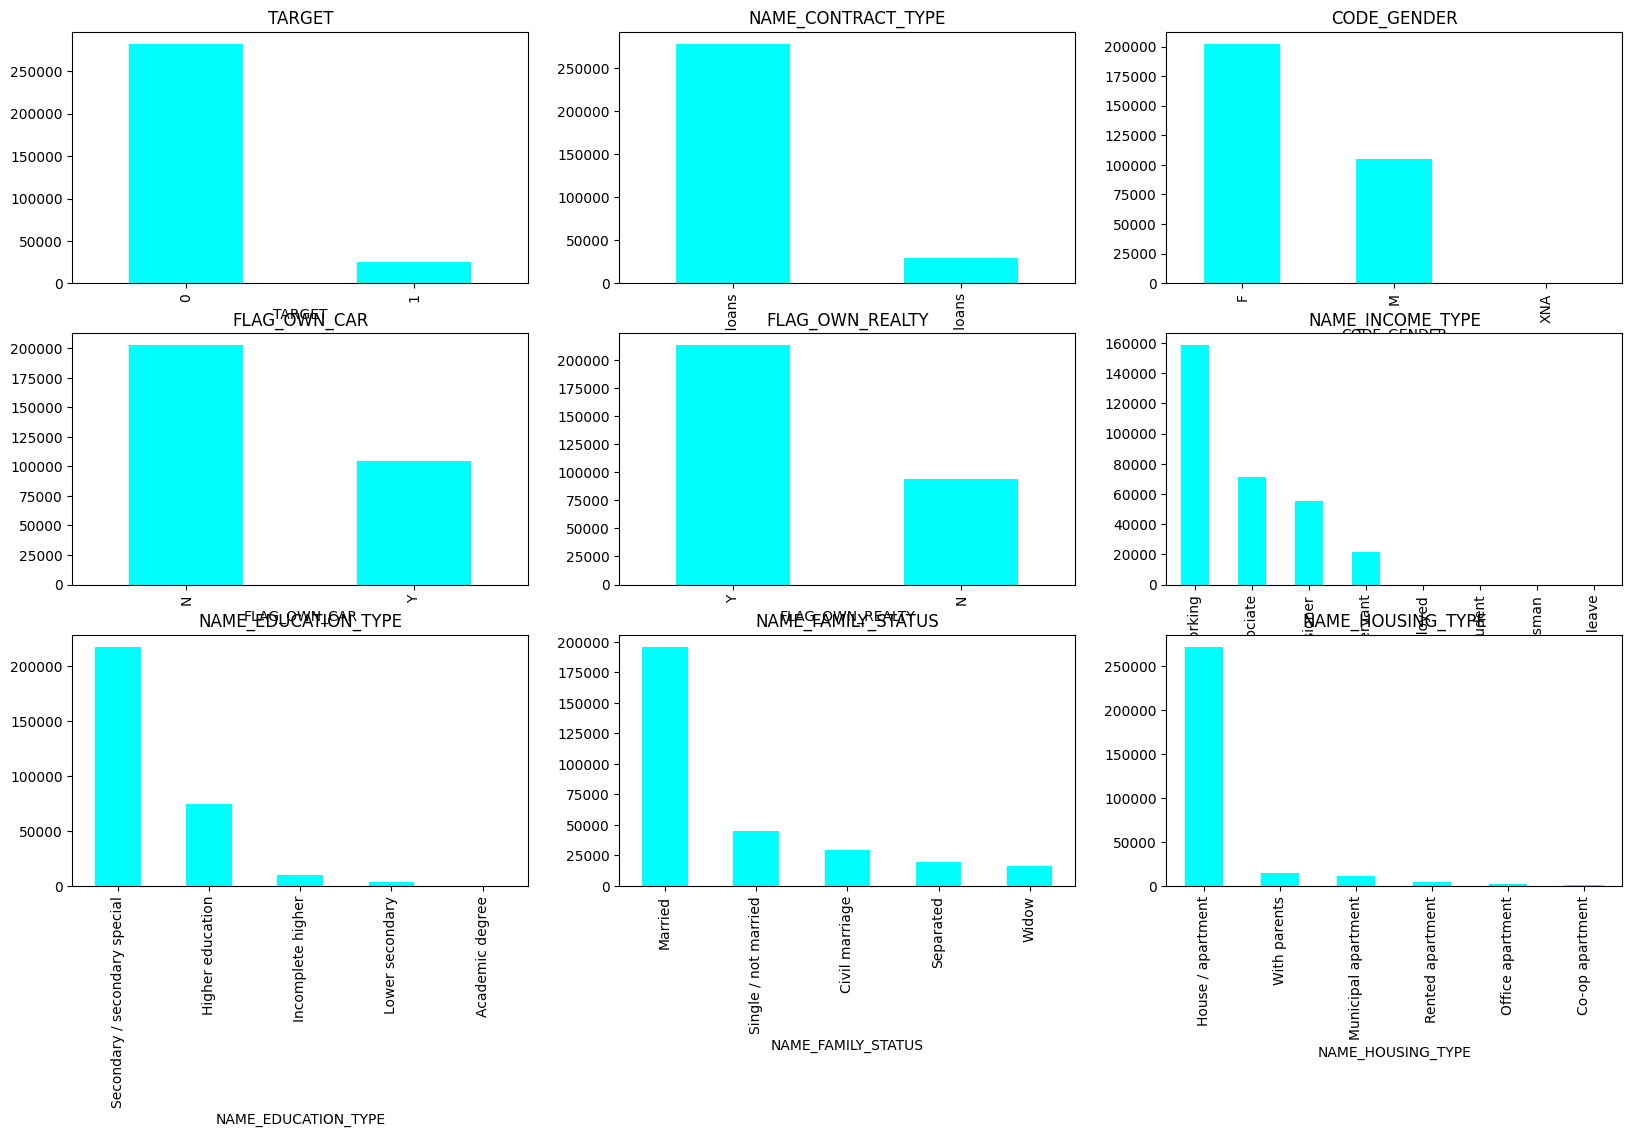

In [56]:
# Listing columns for checking data imbalance and plotting them
column_list = ["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_INCOME_TYPE",
            "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE"]
k=0
plt.figure(figsize=(20,15))
for column in column_list:    
    k=k+1
    plt.subplot(4, 3,k)    
    df_current_application[column].value_counts().plot(kind="bar",color="cyan");
    plt.title(column)

We can see that there is data imbalance in below columns:-

* TARGET - There are very few defaulters(1) compare to non defaulters(0)
* NAME_CONTRACT_TYPE - There are very few Revolving loans than Cash loans
* NAME_EDUCATION_TYPE - Most of the loans applied by Secondary/Secondary special educated people
* NAME_FAMILY_STATUS - Most of the loans applied by Married people.
* NAME_HOUSING_TYPE - Most of the application came from Home/appartment owner

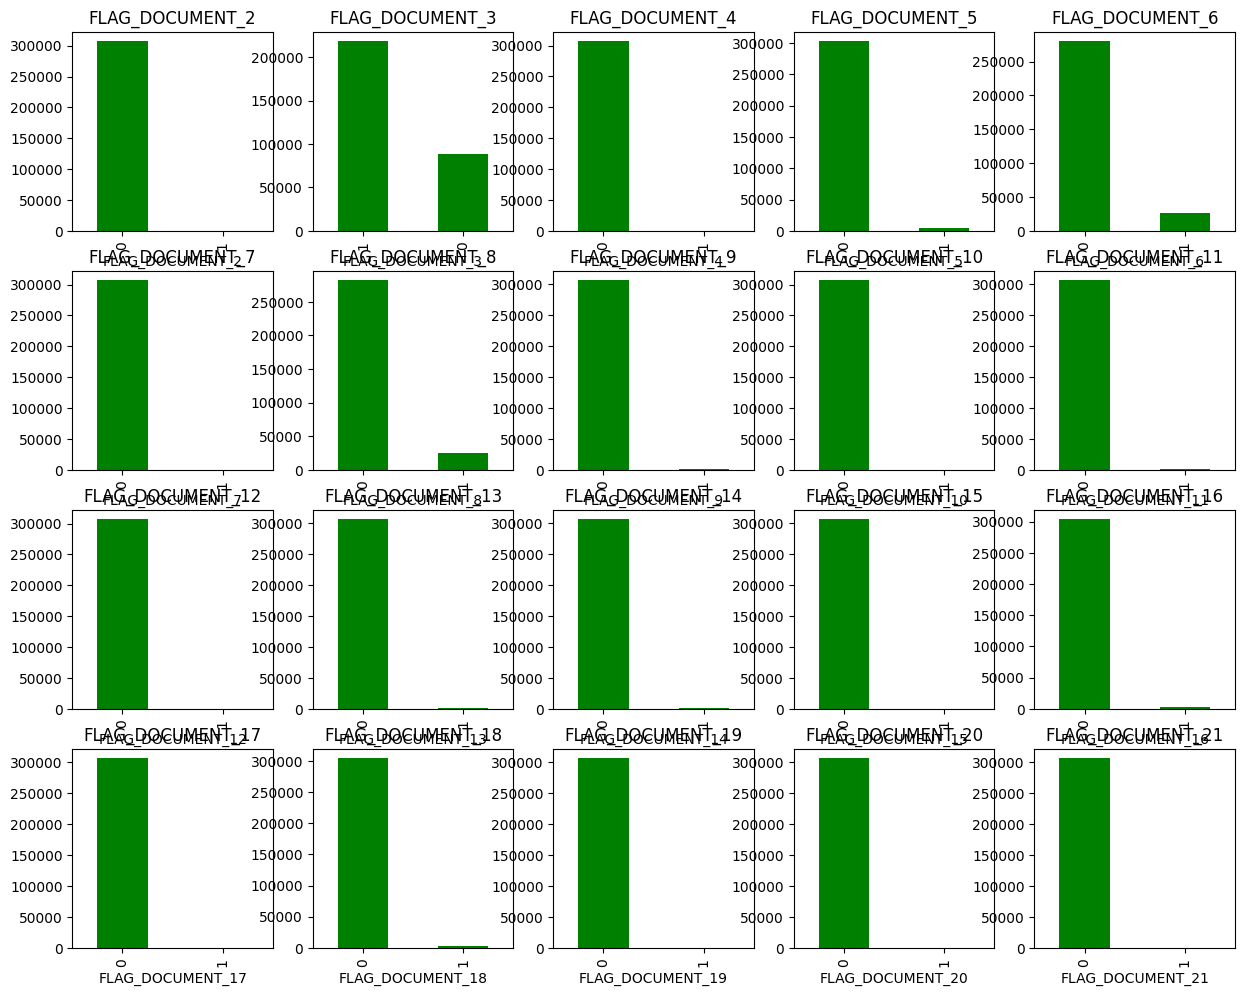

In [57]:
# Plotting all the FLAG_DOCUMENT columns to check data imbalance
k=0
plt.figure(figsize=(15,15))
for i in range(2,22) :    
    k=k+1
    plt.subplot(5, 5,k)    
    col_name = "FLAG_DOCUMENT_"+str(i)
    df_current_application[col_name].value_counts().plot(kind="bar", color="Green");
    plt.title(col_name)

As we can see that except FLAG_DOCUMENT_3 all the columns have negligible count of 1s. So we are removing all the FLAG_DOCUMENT columns except FLAG_DOCUMENT_3

In [58]:
# Delete all teh FLAG_DOCUMENT columns except FLAG_DOCUMENT_3
df_current_application.drop("FLAG_DOCUMENT_2",axis=1,inplace=True)
for i in range(4,22):
    col = "FLAG_DOCUMENT_"+str(i)
    df_current_application.drop(col,axis=1,inplace=True)

Binning of AGE, AMT_INCOME_TOTAL, AMT_CREDIT and EXT_SOURCE_SCORE columns

Creating three age groups - Young, Mid age and Senior citizen

In [59]:
df_current_application["AGE"].describe()

count    307004.000000
mean         44.439812
std          11.953230
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE, dtype: float64

In [60]:
# Define function for categorizing AGE_GROUP (Young, Mid age and Senior)
def age_group(x):
    if (x < 40):
        return "Young"
    elif (x >= 40 and x < 60):
        return "Mid Age"
    else:
        return "Senior"

In [61]:
#Creating new column AGE_GROUP
df_current_application["AGE_GROUP"] = df_current_application["AGE"].apply(age_group)
df_current_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE   
0         351000.0          Working  Secondary / secondary special  \
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   
0  Single / not married  House / apartment                    0.018801  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT   
0            -2120              1.0                     2  \
1             -291              2.0                     1   
2            -2531              1.0                     2   
3            -2437              2.0                     2   
4            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION   
0                            2                           0  \
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  EXT_SOURCE_2   
0                           0  Business Entity Type 3      0.262949  \
1                           0                  School      0.622246   
2                           0              Government      0.555912   
3                           0  Business Entity Type 3      0.650442   
4                           0                Religion      0.322738   

   EXT_SOURCE_3  FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_QRT  AGE   
0      0.139376                1                       0.0   26  \
1      0.510853                1                       0.0   46   
2      0.729567                0                       0.0   53   
3      0.510853                1                       0.0   53   
4      0.510853                0                       0.0   55   

   YEARS_EMPLOYED AGE_GROUP  
0               2     Young  
1               4   Mid Age  
2               1   Mid Age  
3               9   Mid Age  
4               9   Mid Age

Creating three credit amount groups - High, medium and low

In [62]:
round(df_current_application["AMT_CREDIT"].describe(),2)

count     307004.00
mean      599407.24
std       402558.12
min        45000.00
25%       270000.00
50%       514777.50
75%       808650.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64

In [63]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(x):
    if (x < 500000):
        return "Low"
    elif (x >= 500000 and x < 750000):
        return "Medium"
    else:
        return "High"

In [64]:
#Creating new column AGE_GROUP
df_current_application["CREDIT_GROUP"] = df_current_application["AMT_CREDIT"].apply(credit_group)
df_current_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE   
0         351000.0          Working  Secondary / secondary special  \
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   
0  Single / not married  House / apartment                    0.018801  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT   
0            -2120              1.0                     2  \
1             -291              2.0                     1   
2            -2531              1.0                     2   
3            -2437              2.0                     2   
4            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION   
0                            2                           0  \
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  EXT_SOURCE_2   
0                           0  Business Entity Type 3      0.262949  \
1                           0                  School      0.622246   
2                           0              Government      0.555912   
3                           0  Business Entity Type 3      0.650442   
4                           0                Religion      0.322738   

   EXT_SOURCE_3  FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_QRT  AGE   
0      0.139376                1                       0.0   26  \
1      0.510853                1                       0.0   46   
2      0.729567                0                       0.0   53   
3      0.510853                1                       0.0   53   
4      0.510853                0                       0.0   55   

   YEARS_EMPLOYED AGE_GROUP CREDIT_GROUP  
0               2     Young          Low  
1               4   Mid Age         High  
2               1   Mid Age          Low  
3               9   Mid Age          Low  
4               9   Mid Age       Medium

Creating three income groups - Hign, medium and Low

In [69]:
df_current_application["AMT_INCOME_TOTAL"].describe()

count    3.070040e+05
mean     1.688490e+05
std      2.372935e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [70]:
# Define function for categorizing AMOUNT_INCOME_TOTAL (Low, Medium and High)
def income_group(x):
    if (x < 100000):
        return "Low"
    elif(x >= 100000 and x < 150000):
        return "Medium"
    else:
        return "High"

In [71]:
# Creating column INCOME_GROUP with AMT_INCOME_TOTAL (Low, Medium and High)
df_current_application["INCOME_GROUP"] = df_current_application["AMT_INCOME_TOTAL"].apply(income_group)
df_current_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE   
0         351000.0          Working  Secondary / secondary special  \
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   
0  Single / not married  House / apartment                    0.018801  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT   
0            -2120              1.0                     2  \
1             -291              2.0                     1   
2            -2531              1.0                     2   
3            -2437              2.0                     2   
4            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION   
0                            2                           0  \
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  EXT_SOURCE_2   
0                           0  Business Entity Type 3      0.262949  \
1                           0                  School      0.622246   
2                           0              Government      0.555912   
3                           0  Business Entity Type 3      0.650442   
4                           0                Religion      0.322738   

   EXT_SOURCE_3  FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_QRT  AGE   
0      0.139376                1                       0.0   26  \
1      0.510853                1                       0.0   46   
2      0.729567                0                       0.0   53   
3      0.510853                1                       0.0   53   
4      0.510853                0                       0.0   55   

   YEARS_EMPLOYED AGE_GROUP CREDIT_GROUP INCOME_GROUP  
0               2     Young          Low         High  
1               4   Mid Age         High         High  
2               1   Mid Age          Low          Low  
3               9   Mid Age          Low       Medium  
4               9   Mid Age       Medium       Medium

For the simplification of analysis of Normalized score from external data source, we are taking average of two different external data sources (EXT_SOURCE_2 and EXT_SOURCE_3) and creating a column called EXT_SOURCE_SCORE

In [53]:
df_current_application["EXT_SOURCE_SCORE"] = round(((df_current_application["EXT_SOURCE_2"] + df_current_application["EXT_SOURCE_3"])/2),2)
df_current_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120              1.0                     2   
1             -291              2.0                     1   
2            -2531              1.0                     2   
3            -2437              2.0                     2   
4            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                           0  Business Entity Type 3      0.262949   
1                           0                  School      0.622246   
2                           0              Government      0.555912   
3                           0  Business Entity Type 3      0.650442   
4                           0                Religion      0.322738   

   EXT_SOURCE_3  FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_QRT  AGE  \
0      0.139376                1                       0.0   26   
1      0.510853                1                       0.0   46   
2      0.729567                0                       0.0   53   
3      0.510853                1                       0.0   53   
4      0.510853                0                       0.0   55   

   YEARS_EMPLOYED AGE_GROUP CREDIT_GROUP INCOME_GROUP  EXT_SOURCE_SCORE  
0               2     Young          Low         High              0.20  
1               4   Mid Age         High         High              0.57  
2               1   Mid Age          Low          Low              0.64  
3               9   Mid Age          Low       Medium              0.58  
4               9   Mid Age       Medium       Medium              0.42

In [73]:
# Dropping (EXT_SOURCE_2 and EXT_SOURCE_3 columns
df_current_application.drop(["EXT_SOURCE_2","EXT_SOURCE_3"],axis=1,inplace=True)

Creating three External source score groups - High, Medium and Low

In [72]:
df_current_application["EXT_SOURCE_SCORE"].describe()

KeyError: 'EXT_SOURCE_SCORE'

In [56]:
# Define function for categorizing EXT_SOURCE_SCORE (Low, Medium and High)
def ext_source_group(x):
    if (x < 0.4):
        return "Low"
    elif (x >= 0.4 and x < 0.6):
        return "Medium"
    else:
        return "High"

In [57]:
# Creating column EXT_SCORE_CATEGORY with High, medium and Low
df_current_application["EXT_SCORE_CATEGORY"] = df_current_application["EXT_SOURCE_SCORE"].apply(ext_source_group)
df_current_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120              1.0                     2   
1             -291              2.0                     1   
2            -2531              1.0                     2   
3            -2437              2.0                     2   
4            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  FLAG_DOCUMENT_3  \
0                           0  Business Entity Type 3                1   
1                           0                  School                1   
2                           0              Government                0   
3                           0  Business Entity Type 3                1   
4                           0                Religion                0   

  AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED AGE_GROUP CREDIT_GROUP  \
0                       0.0   26               2     Young          Low   
1                       0.0   46               4   Mid Age         High   
2                       0.0   53               1   Mid Age          Low   
3                       0.0   53               9   Mid Age          Low   
4                       0.0   55               9   Mid Age       Medium   

  INCOME_GROUP  EXT_SOURCE_SCORE EXT_SCORE_CATEGORY  
0         High              0.20                Low  
1         High              0.57             Medium  
2          Low              0.64               High  
3       Medium              0.58             Medium  
4       Medium              0.42             Medium

In [58]:
# Remove rows where CODE_GENDER == XNA
# There are four such rows
df_current_application = df_current_application[~(df_current_application["CODE_GENDER"] == "XNA")]

#### Dividing data into two data sets

Client with payment difficulties (Target=1); 
All other cases (Target=0)

In [74]:
# Client with payment difficulties (Target=1)S
df_current_target_1 = df_current_application[df_current_application["TARGET"] == 1]
df_current_target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0       100002       1         Cash loans           M            N  \
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0                Y             0          202500.0    406597.5      24700.5  \
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE   
0          351000.0               Working  Secondary / secondary special  \
26         702000.0               Working  Secondary / secondary special   
40         855000.0  Commercial associate  Secondary / secondary special   
42         238500.0               Working  Secondary / secondary special   
81         252000.0             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   
0   Single / not married  House / apartment                    0.018801  \
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT   
0             -2120              1.0                     2  \
26            -1827              1.0                     3   
40            -1029              2.0                     2   
42            -4409              2.0                     3   
81            -4199              2.0                     2   

    REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION   
0                             2                           0  \
26                            2                           0   
40                            2                           0   
42                            3                           0   
81                            2                           0   

    REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  FLAG_DOCUMENT_3   
0                            0  Business Entity Type 3                1  \
26                           0  Business Entity Type 3                1   
40                           0  Business Entity Type 3                1   
42                           0           Self-employed                1   
81                           0                     XNA                0   

   AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED AGE_GROUP CREDIT_GROUP   
0                        0.0   26               2     Young          Low  \
26                       2.0   52               8   Mid Age         High   
40                       0.0   48               4   Mid Age         High   
42                       0.0   37              10     Young          Low   
81                       0.0   68            1000    Senior          Low   

   INCOME_GROUP  
0          High  
26       Medium  
40         High  
42       Medium  
81          Low

In [75]:
# Client with all other cases (Target=0)
df_current_target_0 = df_current_application[df_current_application["TARGET"] == 0]
df_current_target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
1      100003       0         Cash loans           F            N  \
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
1               N             0          270000.0   1293502.5      35698.5  \
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE   
1        1129500.0    State servant               Higher education  \
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   
5         454500.0    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   
1               Married  House / apartment                    0.003541  \
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT   
1             -291              2.0                     1  \
2            -2531              1.0                     2   
3            -2437              2.0                     2   
4            -3458              1.0                     2   
5             -477              2.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION   
1                            1                           0  \
2                            2                           0   
3                            2                           0   
4                            2                           0   
5                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  FLAG_DOCUMENT_3   
1                           0                  School                1  \
2                           0              Government                0   
3                           0  Business Entity Type 3                1   
4                           0                Religion                0   
5                           0                   Other                1   

  AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED AGE_GROUP CREDIT_GROUP   
1                       0.0   46               4   Mid Age         High  \
2                       0.0   53               1   Mid Age          Low   
3                       0.0   53               9   Mid Age          Low   
4                       0.0   55               9   Mid Age       Medium   
5                       1.0   47               5   Mid Age          Low   

  INCOME_GROUP  
1         High  
2          Low  
3       Medium  
4       Medium  
5          Low

In [76]:
df_current_target_0.shape

(282217, 30)

In [77]:
df_current_target_1.shape

(24787, 30)

### Analysing the Banking Data

#### Univariate analysis for Unordered categorical variables

#####  Defaulters and non-defaulters on the basis of gender

[Text(0.5, 0, 'Gender')]

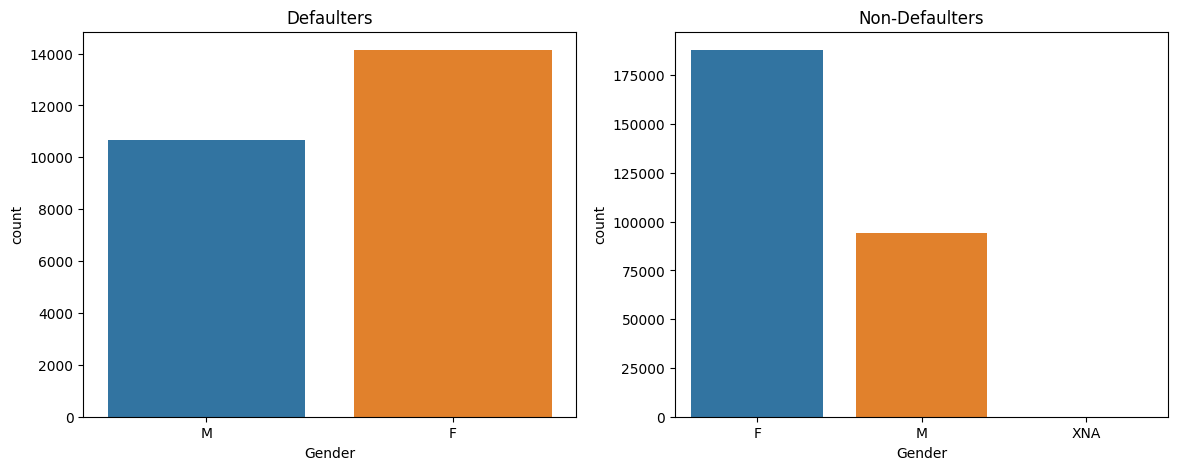

In [78]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = "CODE_GENDER",data=df_current_target_1)
plt.title("Defaulters")
ax.set(xlabel="Gender")

plt.subplot(1,2,2) 
ax = sns.countplot(x = "CODE_GENDER",data=df_current_target_0)
plt.title("Non-Defaulters")
ax.set(xlabel="Gender")

Analysis
* Defaluters - We can see that females are slightly more in number of defaulters than male.
* Non-defaluters - The same pattern continues for non-defaluters as well. The females are more in number here than male.

##### Defaulters and non-defaulters on the basis of Loan type

[Text(0.5, 0, 'Loan type')]

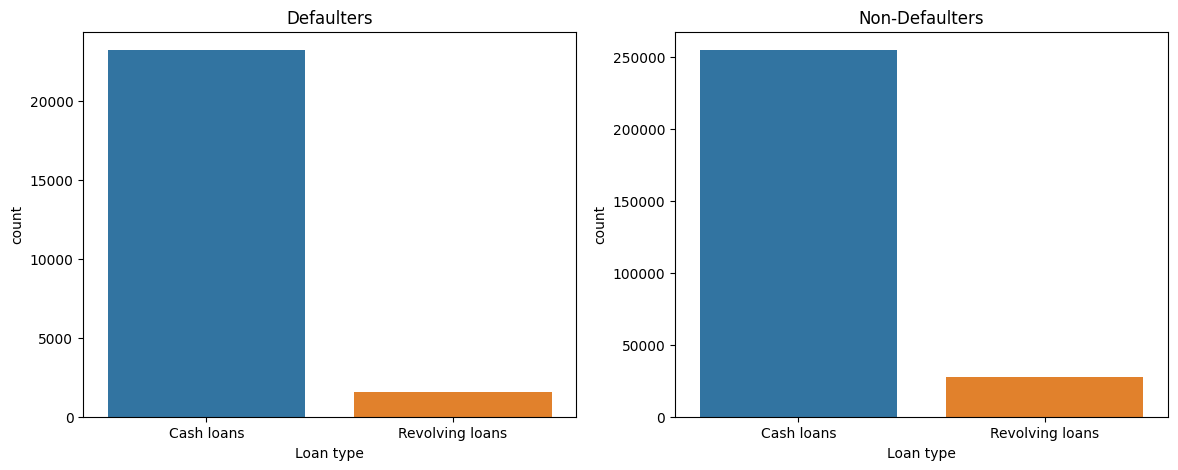

In [79]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = "NAME_CONTRACT_TYPE",data=df_current_target_1)
plt.title("Defaulters")
ax.set(xlabel="Loan type")

plt.subplot(1,2,2) 
ax = sns.countplot(x = "NAME_CONTRACT_TYPE",data=df_current_target_0)
plt.title("Non-Defaulters")
ax.set(xlabel="Loan type")

Analysis
* We see in both the cases that Revolving loans are very less in number compared to Cash loans.

##### Defaulters and non-defaulters on the basis of Income type

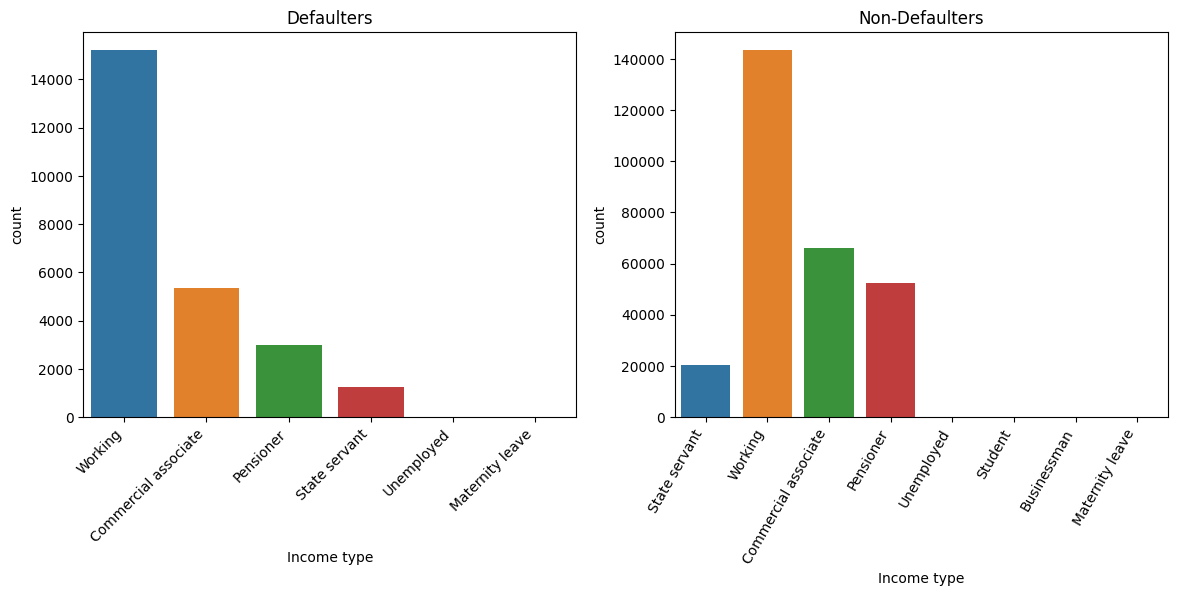

In [80]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = "NAME_INCOME_TYPE",data=df_current_target_1)
plt.title("Defaulters")
ax.set(xlabel="Income type")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment="right")


plt.subplot(1,2,2) 
ax = sns.countplot(x = "NAME_INCOME_TYPE",data=df_current_target_0)
plt.title("Non-Defaulters")
ax.set(xlabel="Income type")
temp = ax.set_xticklabels(ax.get_xticklabels(),rotation = 60, horizontalalignment="right")

Analysis
* Defaulters - Working people are mostly defaulted as their numbers are high with compare to other pfrofessions.
* Non-defaulters - Similarly here also working people are more in number who are not defaulted.

##### Defaulters and non-defaulters on the basis of Education type

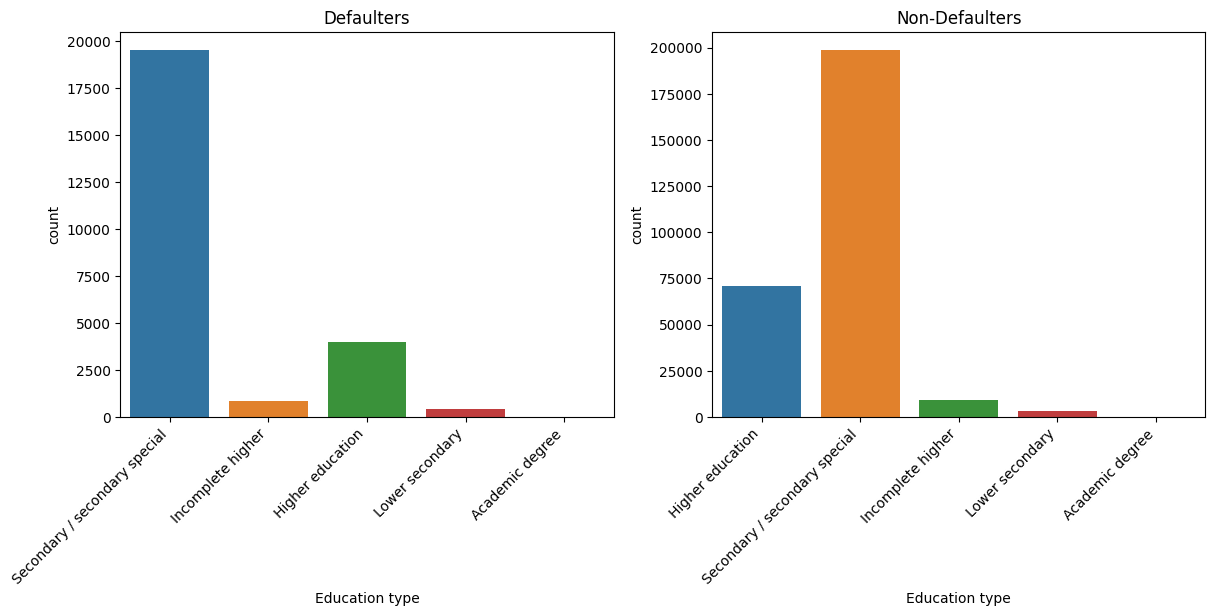

In [81]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = "NAME_EDUCATION_TYPE",data=df_current_target_1)
plt.title("Defaulters")
ax.set(xlabel="Education type")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment="right")


plt.subplot(1,2,2) 
ax = sns.countplot(x = "NAME_EDUCATION_TYPE",data=df_current_target_0)
plt.title("Non-Defaulters")
ax.set(xlabel="Education type")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment="right")

Analysis
* Defaulters - Education with Secondary/Secondary sepcial customers are more number in defaulters comapre with other level of eduacted poeple.
* Non defaulters - Here also Secondary/Secondary sepcial are more in numbers.

##### Defaulters and non-defaulters on the basis of Family status

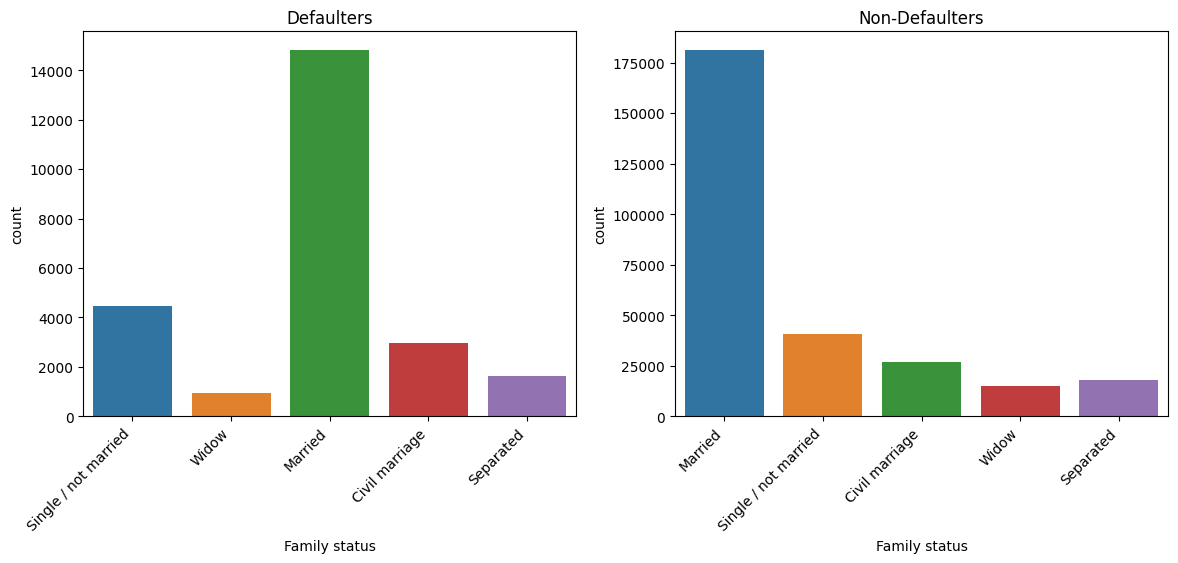

In [82]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = "NAME_FAMILY_STATUS",data=df_current_target_1)
plt.title("Defaulters")
ax.set(xlabel="Family status")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment="right")


plt.subplot(1,2,2) 
ax = sns.countplot(x = "NAME_FAMILY_STATUS",data=df_current_target_0)
plt.title("Non-Defaulters")
ax.set(xlabel="Family status")
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment="right")

Analysis
* For both the customers (defaulters and non-defaulters) married people are more in number comapred with single, separated, widow etc.

#### Univariate analysis for continious variables

##### Defaulters and non-defaulters on the basis of credit amount of the loan

<Axes: title={'center': 'Non Defaulters'}, xlabel='AMT_CREDIT', ylabel='Density'>

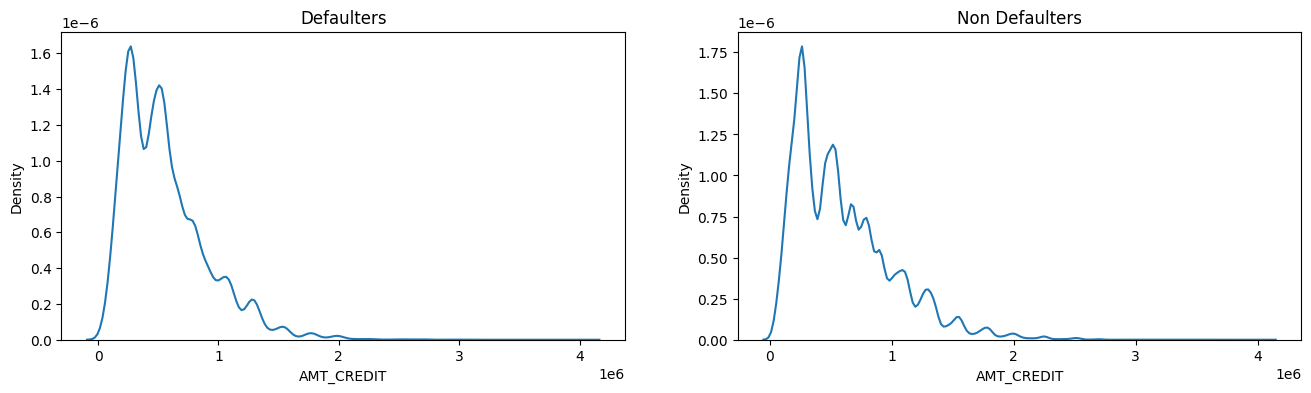

In [86]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1) 
plt.title("Defaulters")
sns.distplot(df_current_target_1["AMT_CREDIT"],hist=False)

plt.subplot(1,2,2) 
plt.title("Non Defaulters")
sns.distplot(df_current_target_0["AMT_CREDIT"],hist=False)

Analysis
* Defaulters - We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. The spike is till 500000.
* Non defaulters - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.

##### Defaulters and non-defaulters on the basis of gender and their total income

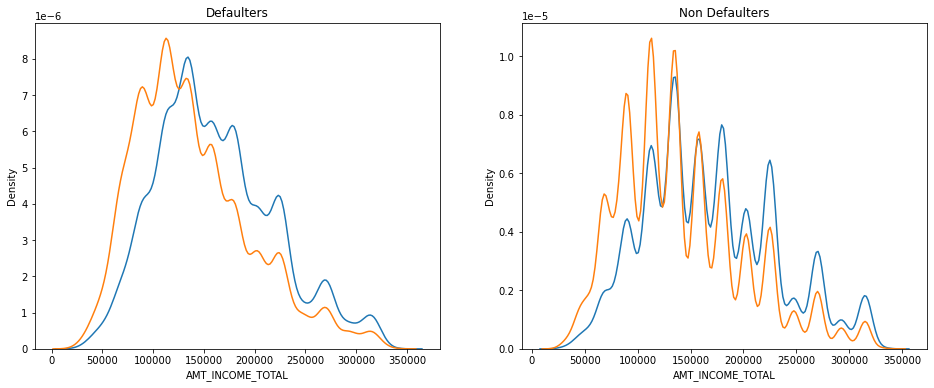

In [69]:
gender = ["M","F"]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title("Defaulters")
for i in gender:
    subset = df_current_target_1[df_current_target_1["CODE_GENDER"] == i]
    sns.distplot(subset["AMT_INCOME_TOTAL"],hist=False,label=i)
    
plt.subplot(1,2,2) 
plt.title("Non Defaulters")
for i in gender:
    subset = df_current_target_0[df_current_target_0["CODE_GENDER"] == i]
    sns.distplot(subset["AMT_INCOME_TOTAL"],hist=False,label=i)
    

Analysis
* Defaulters - We can notice by looking at the pattern that for being a defaulter both the genders (male and female) are almost equal in all income levels. The spike of being defaulters is from 50000 to 200000.
* Non defaulters - Here we see an interesting pattern. Females are more non defaulter on the lower income level but lesser non defaluter in higher income level. The spike is more for both the genders from 75000 to 150000.

##### Defaulters and non-defaulters on the basis of Loan annuity

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

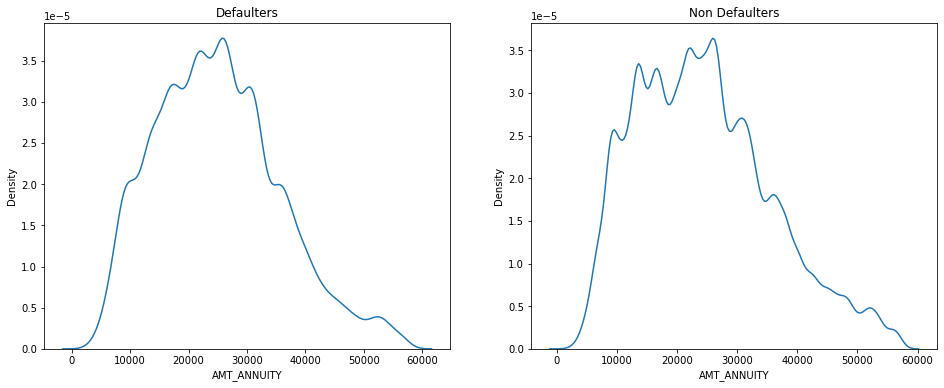

In [70]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title("Defaulters")
sns.distplot(df_current_target_1["AMT_ANNUITY"],hist=False)

plt.subplot(1,2,2) 
plt.title("Non Defaulters")
sns.distplot(df_current_target_0["AMT_ANNUITY"],hist=False)

Analysis
* We can notice from the above distribution plot that in both the cases the loan annuity is concentrated more from 10000 to 40000.

### Segmented Univariate analysis for ordered categorical variables

#### Percentage of age group applicants defaulted and not defaulted

The analysis below showed that the how much percentage of each age group(Young, Mid age and Senior citizen) applicants are defaulted and are not defaulted.

In [71]:
# Taking the percentage of each age group who was defaulted.
# Divide each defaulted age group count by total count of that age group
young_1 = round(100*len(df_current_application[(df_current_application["AGE_GROUP"] == "Young") & (df_current_application["TARGET"] == 1)])/len(df_current_application[df_current_application["AGE_GROUP"] == "Young"]),2)
midage_1 = round(100*len(df_current_application[(df_current_application["AGE_GROUP"] == "Mid Age") & (df_current_application["TARGET"] == 1)])/len(df_current_application[df_current_application["AGE_GROUP"] == "Mid Age"]),2)
senior_1 = round(100*len(df_current_application[(df_current_application["AGE_GROUP"] == "Senior") & (df_current_application["TARGET"] == 1)])/len(df_current_application[df_current_application["AGE_GROUP"] == "Senior"]),2)

In [72]:
# Creating a dataframe of the defaulted age group percentage
agegroup_default = {"AGE_GROUP":["Young", "Mid Age", "Senior"], "Percentage":[young_1, midage_1, senior_1]} 
df_agegroup_default = pd.DataFrame(agegroup_default) 
df_agegroup_default

AGE_GROUP  Percentage
0     Young       10.79
1   Mid Age        7.37
2    Senior        5.08

In [73]:
# Taking the percentage of each age group who was not defaulted.
# Divide each non defaulted age group count by total count of that age group
young_0 = round(100*len(df_current_application[(df_current_application["AGE_GROUP"] == "Young") & (df_current_application["TARGET"] == 0)])/len(df_current_application[df_current_application["AGE_GROUP"] == "Young"]),2)
midage_0 = round(100*len(df_current_application[(df_current_application["AGE_GROUP"] == "Mid Age") & (df_current_application["TARGET"] == 0)])/len(df_current_application[df_current_application["AGE_GROUP"] == "Mid Age"]),2)
senior_0 = round(100*len(df_current_application[(df_current_application["AGE_GROUP"] == "Senior") & (df_current_application["TARGET"] == 0)])/len(df_current_application[df_current_application["AGE_GROUP"] == "Senior"]),2)

In [74]:
# Creating a dataframe of the non defaulted age group percentage
agegroup_nondefault = {"AGE_GROUP":["Young", "Mid Age", "Senior"], "Percentage":[young_0, midage_0, senior_0]} 
df_agegroup_nondefault = pd.DataFrame(agegroup_nondefault) 
df_agegroup_nondefault

AGE_GROUP  Percentage
0     Young       89.21
1   Mid Age       92.63
2    Senior       94.92

Text(0.5, 1.0, 'Non-Defaulters')

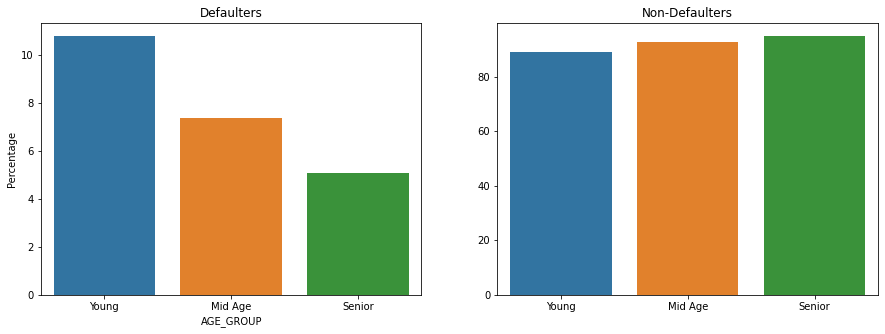

In [75]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x="AGE_GROUP",y="Percentage",data=df_agegroup_default)
plt.title("Defaulters")

plt.subplot(1,2,2)
sns.barplot(x="AGE_GROUP",y="Percentage",data=agegroup_nondefault)
plt.title("Non-Defaulters")

Analysis
* Defaulters - We see that Young people are more likely to default than other two age groups. Whereas, Senior citizens are less likely to default than others.
* Non defaulters - There is not much difference in the likelihood for non defaulters in the age groups.

##### Credit amount group

Text(0.5, 1.0, 'Non-Defaulters')

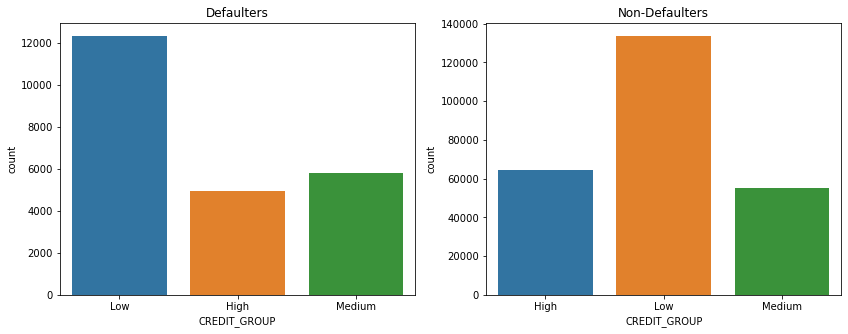

In [76]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = "CREDIT_GROUP",data=df_current_target_1)
plt.title("Defaulters")

plt.subplot(1,2,2) 
ax = sns.countplot(x = "CREDIT_GROUP",data=df_current_target_0)
plt.title("Non-Defaulters")

Analysis
* Defaulters - Surprisingly low credited amount groups are more defaulters.
* Non defaulters - As expected low credit amount groups are more in number, who were not defaulted.

##### Income group

Text(0.5, 1.0, 'Non-Defaulters')

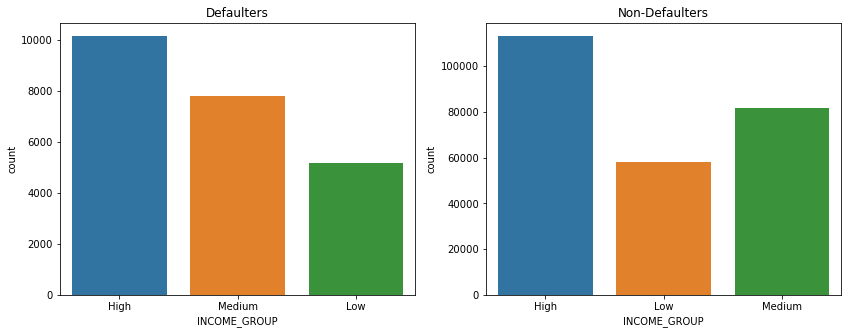

In [77]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = "INCOME_GROUP",data=df_current_target_1)
plt.title("Defaulters")

plt.subplot(1,2,2) 
ax = sns.countplot(x = "INCOME_GROUP",data=df_current_target_0)
plt.title("Non-Defaulters")

Analysis
* Defaulters - Surprisingly the High income group is more in number to be defaulted, then Medium and then Low.
* Non defaulters - Here as expected the count of non defaulters more in High income group and less in low income group.

##### Normalized score from external data source

Text(0.5, 1.0, 'Non-Defaulters')

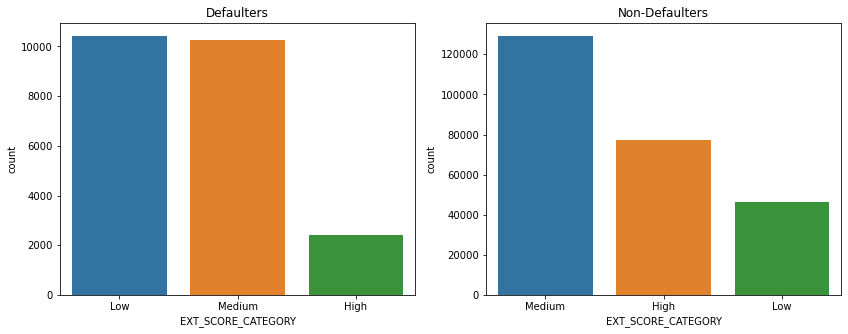

In [78]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = "EXT_SCORE_CATEGORY",data=df_current_target_1)
plt.title("Defaulters")

plt.subplot(1,2,2) 
ax = sns.countplot(x = "EXT_SCORE_CATEGORY",data=df_current_target_0)
plt.title("Non-Defaulters")

Analysis
* Defaulters - No surprise that low scorer from external data source are more defaulters. Also, the medium scorer are as likely defaulter as low scorer.
* Non defaulters - Medium scorers are no more defaulted than High scorer. As expected the Low scorers are lesser in number.

### Bivariate analysis

##### Corelation of relevant numerical columns for defaulters and non defaulters

In [79]:
# Listing the relevant columns for finding corelation
corr_cols = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","AGE","EXT_SOURCE_SCORE","REGION_RATING_CLIENT"]

##### Corelation of defaulters

In [80]:
# Creating dataframe for numerical columns
df_corr_target_1 = df_current_target_1[corr_cols]
df_corr_target_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
0           202500.0    406597.5      24700.5         351000.0   26   
26          112500.0    979992.0      27076.5         702000.0   52   
40          202500.0   1193580.0      35028.0         855000.0   48   
42          135000.0    288873.0      16258.5         238500.0   37   
81           81000.0    252000.0      14593.5         252000.0   68   

    EXT_SOURCE_SCORE  REGION_RATING_CLIENT  
0               0.20                     2  
26              0.37                     3  
40              0.31                     2  
42              0.54                     3  
81              0.37                     2

In [81]:
# Corelation matrix
df_corr_target_1.corr() 

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL              1.000000    0.300536     0.379973   
AMT_CREDIT                    0.300536    1.000000     0.743835   
AMT_ANNUITY                   0.379973    0.743835     1.000000   
AMT_GOODS_PRICE               0.300847    0.978326     0.741417   
AGE                          -0.017733    0.134223     0.002448   
EXT_SOURCE_SCORE              0.032894    0.101060     0.080166   
REGION_RATING_CLIENT         -0.141908   -0.037249    -0.043304   

                      AMT_GOODS_PRICE       AGE  EXT_SOURCE_SCORE  \
AMT_INCOME_TOTAL             0.300847 -0.017733          0.032894   
AMT_CREDIT                   0.978326  0.134223          0.101060   
AMT_ANNUITY                  0.741417  0.002448          0.080166   
AMT_GOODS_PRICE              1.000000  0.135488          0.109665   
AGE                          0.135488  1.000000          0.166840   
EXT_SOURCE_SCORE             0.109665  0.166840          1.000000   
REGION_RATING_CLIENT        -0.045769 -0.035831         -0.168471   

                      REGION_RATING_CLIENT  
AMT_INCOME_TOTAL                 -0.141908  
AMT_CREDIT                       -0.037249  
AMT_ANNUITY                      -0.043304  
AMT_GOODS_PRICE                  -0.045769  
AGE                              -0.035831  
EXT_SOURCE_SCORE                 -0.168471  
REGION_RATING_CLIENT              1.000000

<AxesSubplot:>

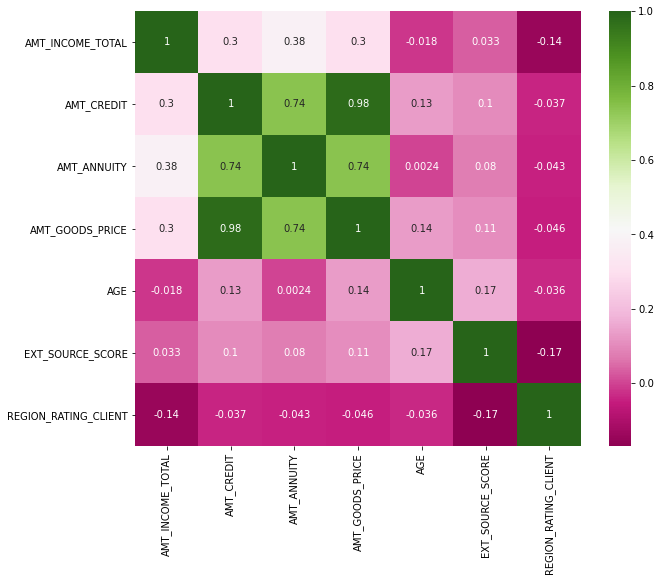

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_1.corr(),cmap="PiYG",annot=True)

Highly corelate columns for defaulters

* AMT_CREDIT and AMT_ANNUITY (0.74)
* AMT_CREDIT and AMT_GOODS_PRICE (0.98)
* AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

In [83]:
# Creating dataframe for numerical columns
df_corr_target_0 = df_current_target_0[corr_cols]
df_corr_target_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
1          270000.0   1293502.5      35698.5        1129500.0   46   
2           67500.0    135000.0       6750.0         135000.0   53   
3          135000.0    312682.5      29686.5         297000.0   53   
4          121500.0    513000.0      21865.5         513000.0   55   
5           99000.0    490495.5      27517.5         454500.0   47   

   EXT_SOURCE_SCORE  REGION_RATING_CLIENT  
1              0.57                     1  
2              0.64                     2  
3              0.58                     2  
4              0.42                     2  
5              0.49                     2

In [84]:
# Corelation matrix
df_corr_target_0.corr() 

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL              1.000000    0.325569     0.404494   
AMT_CREDIT                    0.325569    1.000000     0.762762   
AMT_ANNUITY                   0.404494    0.762762     1.000000   
AMT_GOODS_PRICE               0.328675    0.982246     0.762543   
AGE                          -0.100555    0.047798    -0.022907   
EXT_SOURCE_SCORE              0.042235    0.075219     0.067825   
REGION_RATING_CLIENT         -0.173463   -0.047222    -0.077640   

                      AMT_GOODS_PRICE       AGE  EXT_SOURCE_SCORE  \
AMT_INCOME_TOTAL             0.328675 -0.100555          0.042235   
AMT_CREDIT                   0.982246  0.047798          0.075219   
AMT_ANNUITY                  0.762543 -0.022907          0.067825   
AMT_GOODS_PRICE              1.000000  0.046119          0.082473   
AGE                          0.046119  1.000000          0.173142   
EXT_SOURCE_SCORE             0.082473  0.173142          1.000000   
REGION_RATING_CLIENT        -0.049075 -0.004739         -0.201100   

                      REGION_RATING_CLIENT  
AMT_INCOME_TOTAL                 -0.173463  
AMT_CREDIT                       -0.047222  
AMT_ANNUITY                      -0.077640  
AMT_GOODS_PRICE                  -0.049075  
AGE                              -0.004739  
EXT_SOURCE_SCORE                 -0.201100  
REGION_RATING_CLIENT              1.000000

<AxesSubplot:>

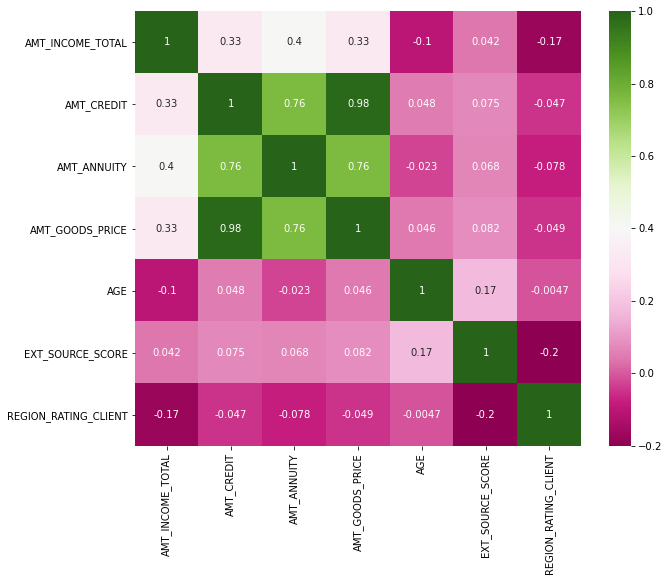

In [85]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_0.corr(),cmap="PiYG",annot=True)

Highly corelate columns for non defaulters

* AMT_CREDIT and AMT_ANNUITY (0.76)
* AMT_CREDIT and AMT_GOODS_PRICE (0.98)
* AMT_ANNUITY and AMT_GOODS_PRICE (0.76)

Conclusion - We can see that for both defaulters and non defaulters the same pairs of columns are highly corelated.

### Bivariate analysis on continious variable

##### Credit amount of the loan on the basis of client income for both male and female

Text(0.5, 1.0, 'Non Defaulters')

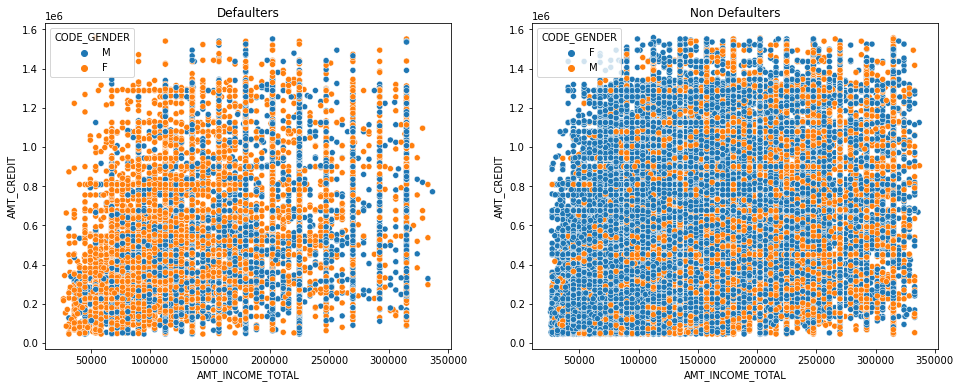

In [86]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot("AMT_INCOME_TOTAL","AMT_CREDIT",hue="CODE_GENDER", data=df_current_target_1)
plt.title("Defaulters")

plt.subplot(1,2,2)
ax = sns.scatterplot("AMT_INCOME_TOTAL","AMT_CREDIT",hue = "CODE_GENDER", data=df_current_target_0)
plt.title("Non Defaulters")

Analysis
* Defaulters - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.
* Non defaulters - We can hardly figure out any pattern out of this.

##### Credit amount of the loan on the basis of Number of enquiries to Credit Bureau about the client

Text(0.5, 1.0, 'Non Defaulters')

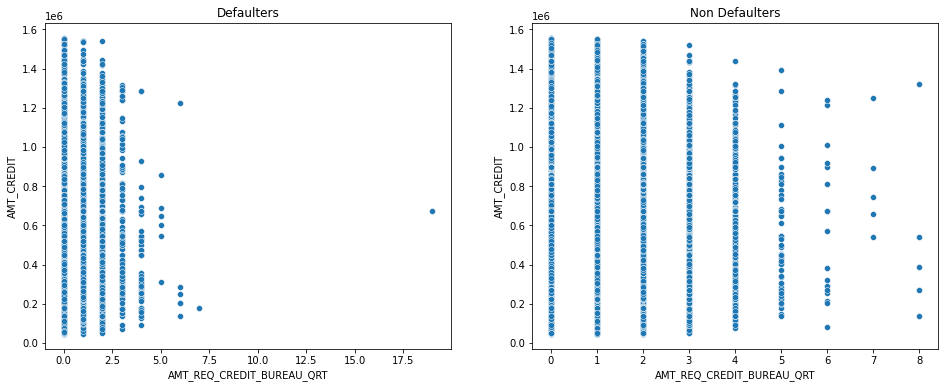

In [87]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot("AMT_REQ_CREDIT_BUREAU_QRT","AMT_CREDIT", data=df_current_target_1)
plt.title("Defaulters")

plt.subplot(1,2,2)
ax = sns.scatterplot("AMT_REQ_CREDIT_BUREAU_QRT","AMT_CREDIT", data=df_current_target_0)
plt.title("Non Defaulters")

Analysis
* We see that the more number of enquiries the lesser the amount of loan credited for both defaulters and non defaulters.

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

In [88]:
# Category list
categories = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
             "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","AGE_GROUP","INCOME_GROUP","EXT_SCORE_CATEGORY"]

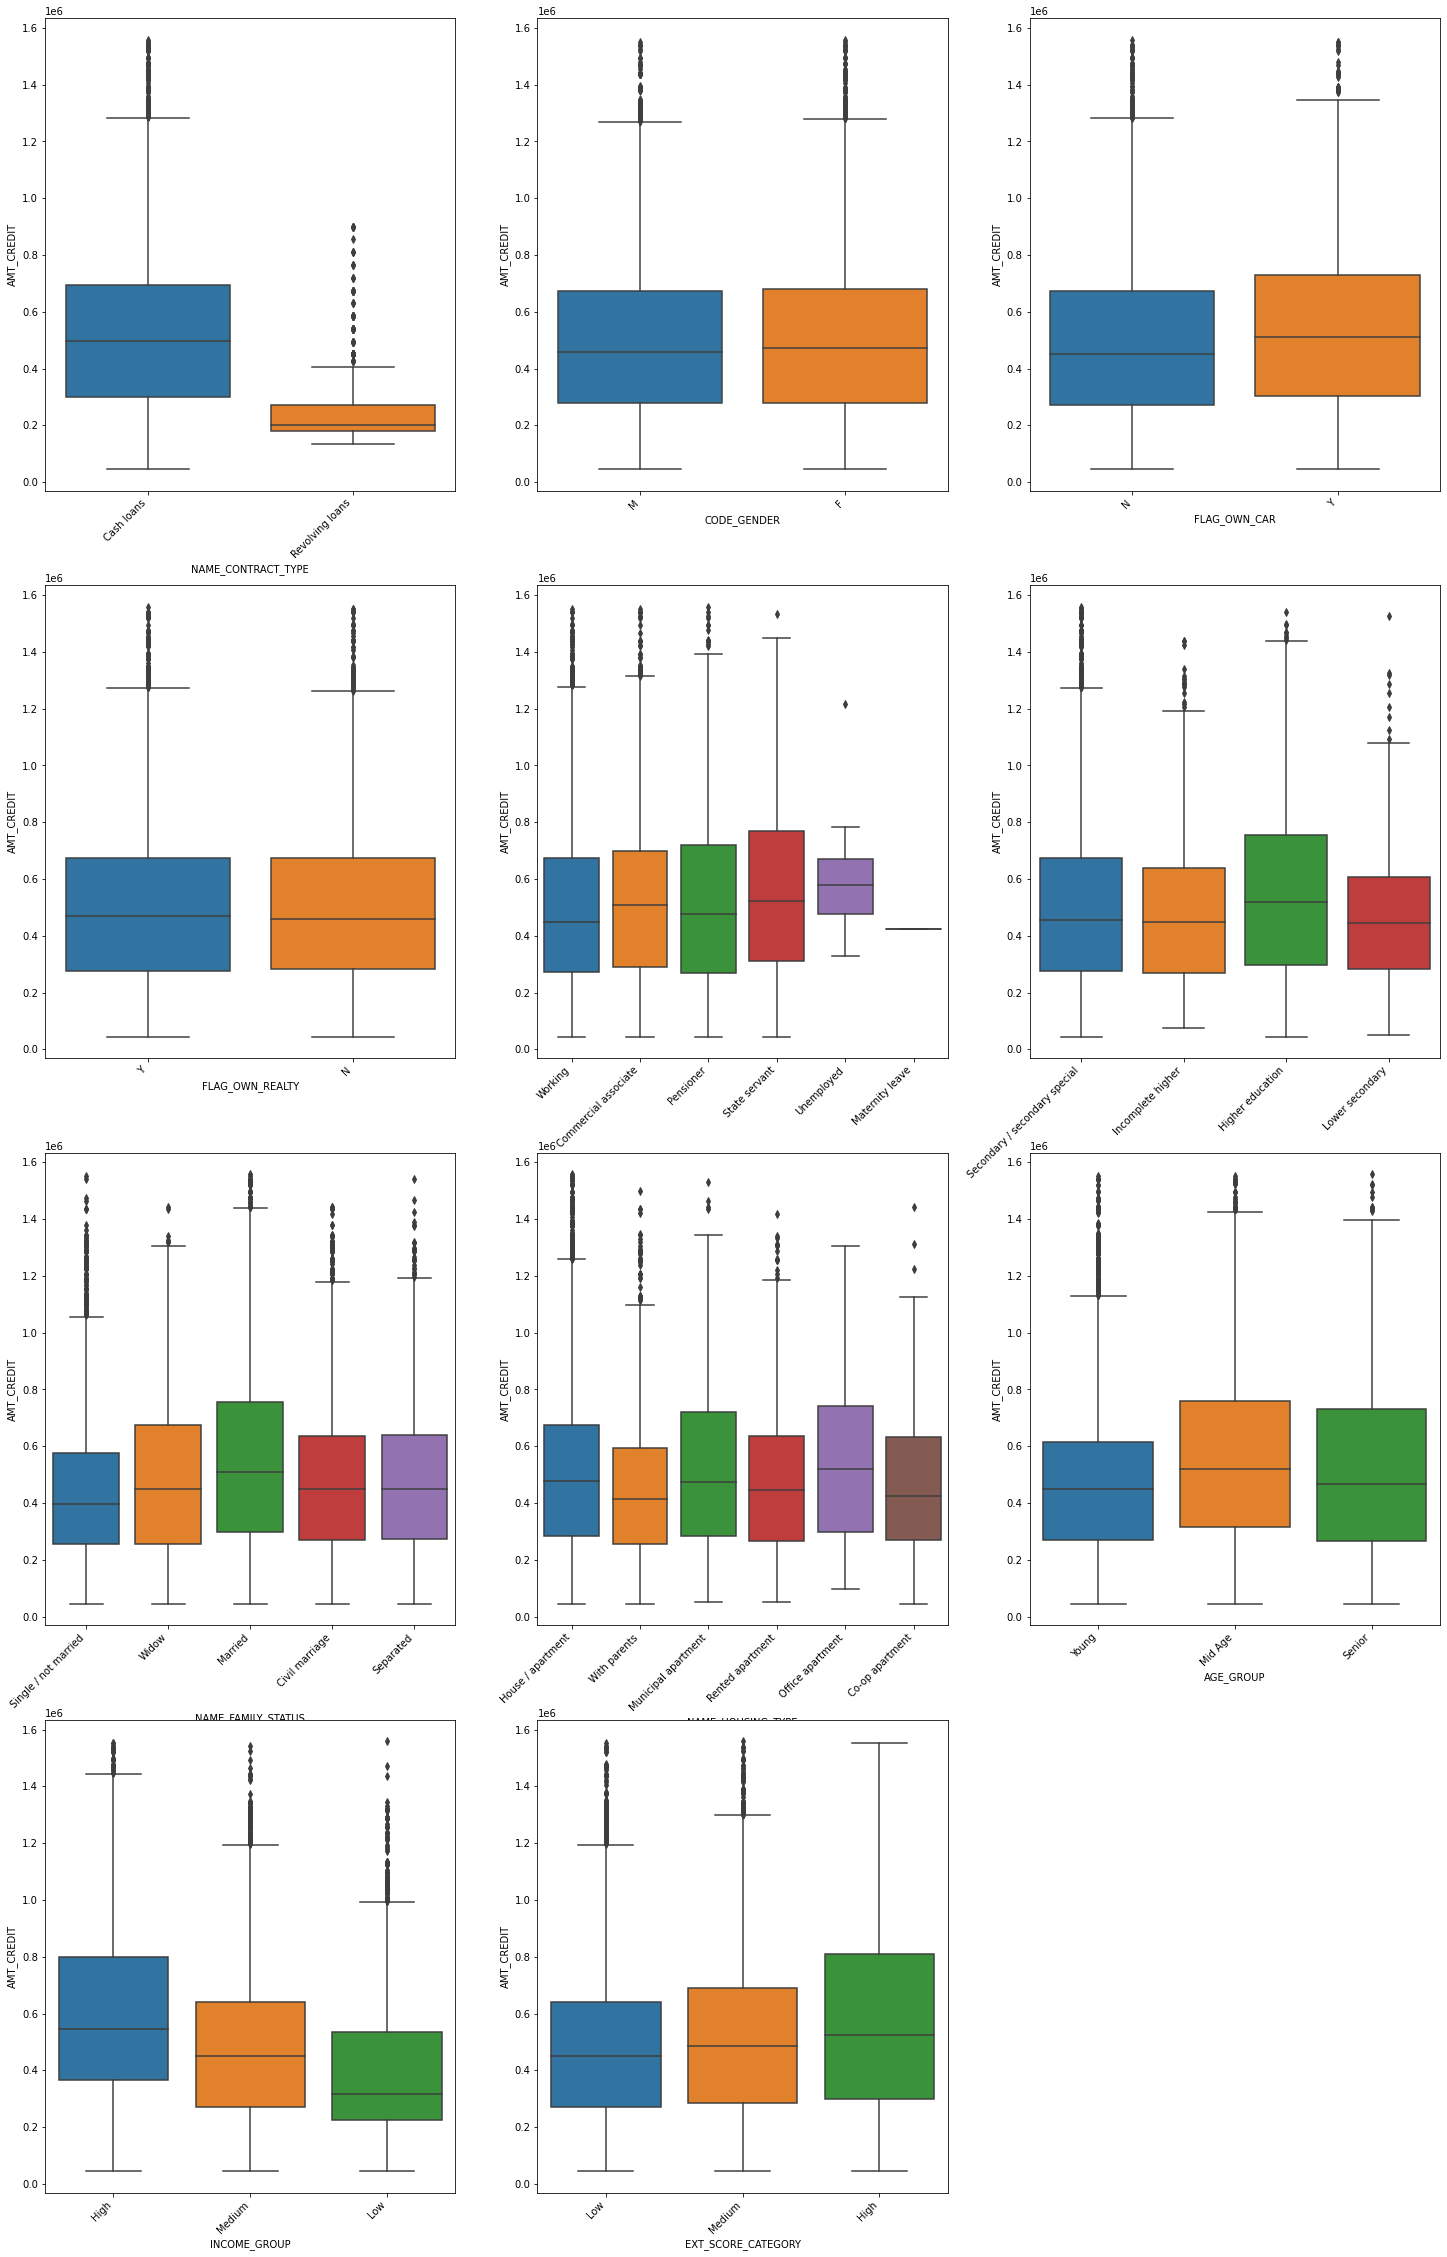

In [89]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = "AMT_CREDIT", data=df_current_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment="right")

Analysis
* Credit amount of the loans are very low for Revolving loans
* There is no credit amount differnce between genders, client owning cars or realty.
* The Young age group got less amount of loan credited cmpared to mid age and senior citizen.
* Higher income group have more loan amount credited.
* Clients having higher external score have more loan amount.

#### Non-defaulters

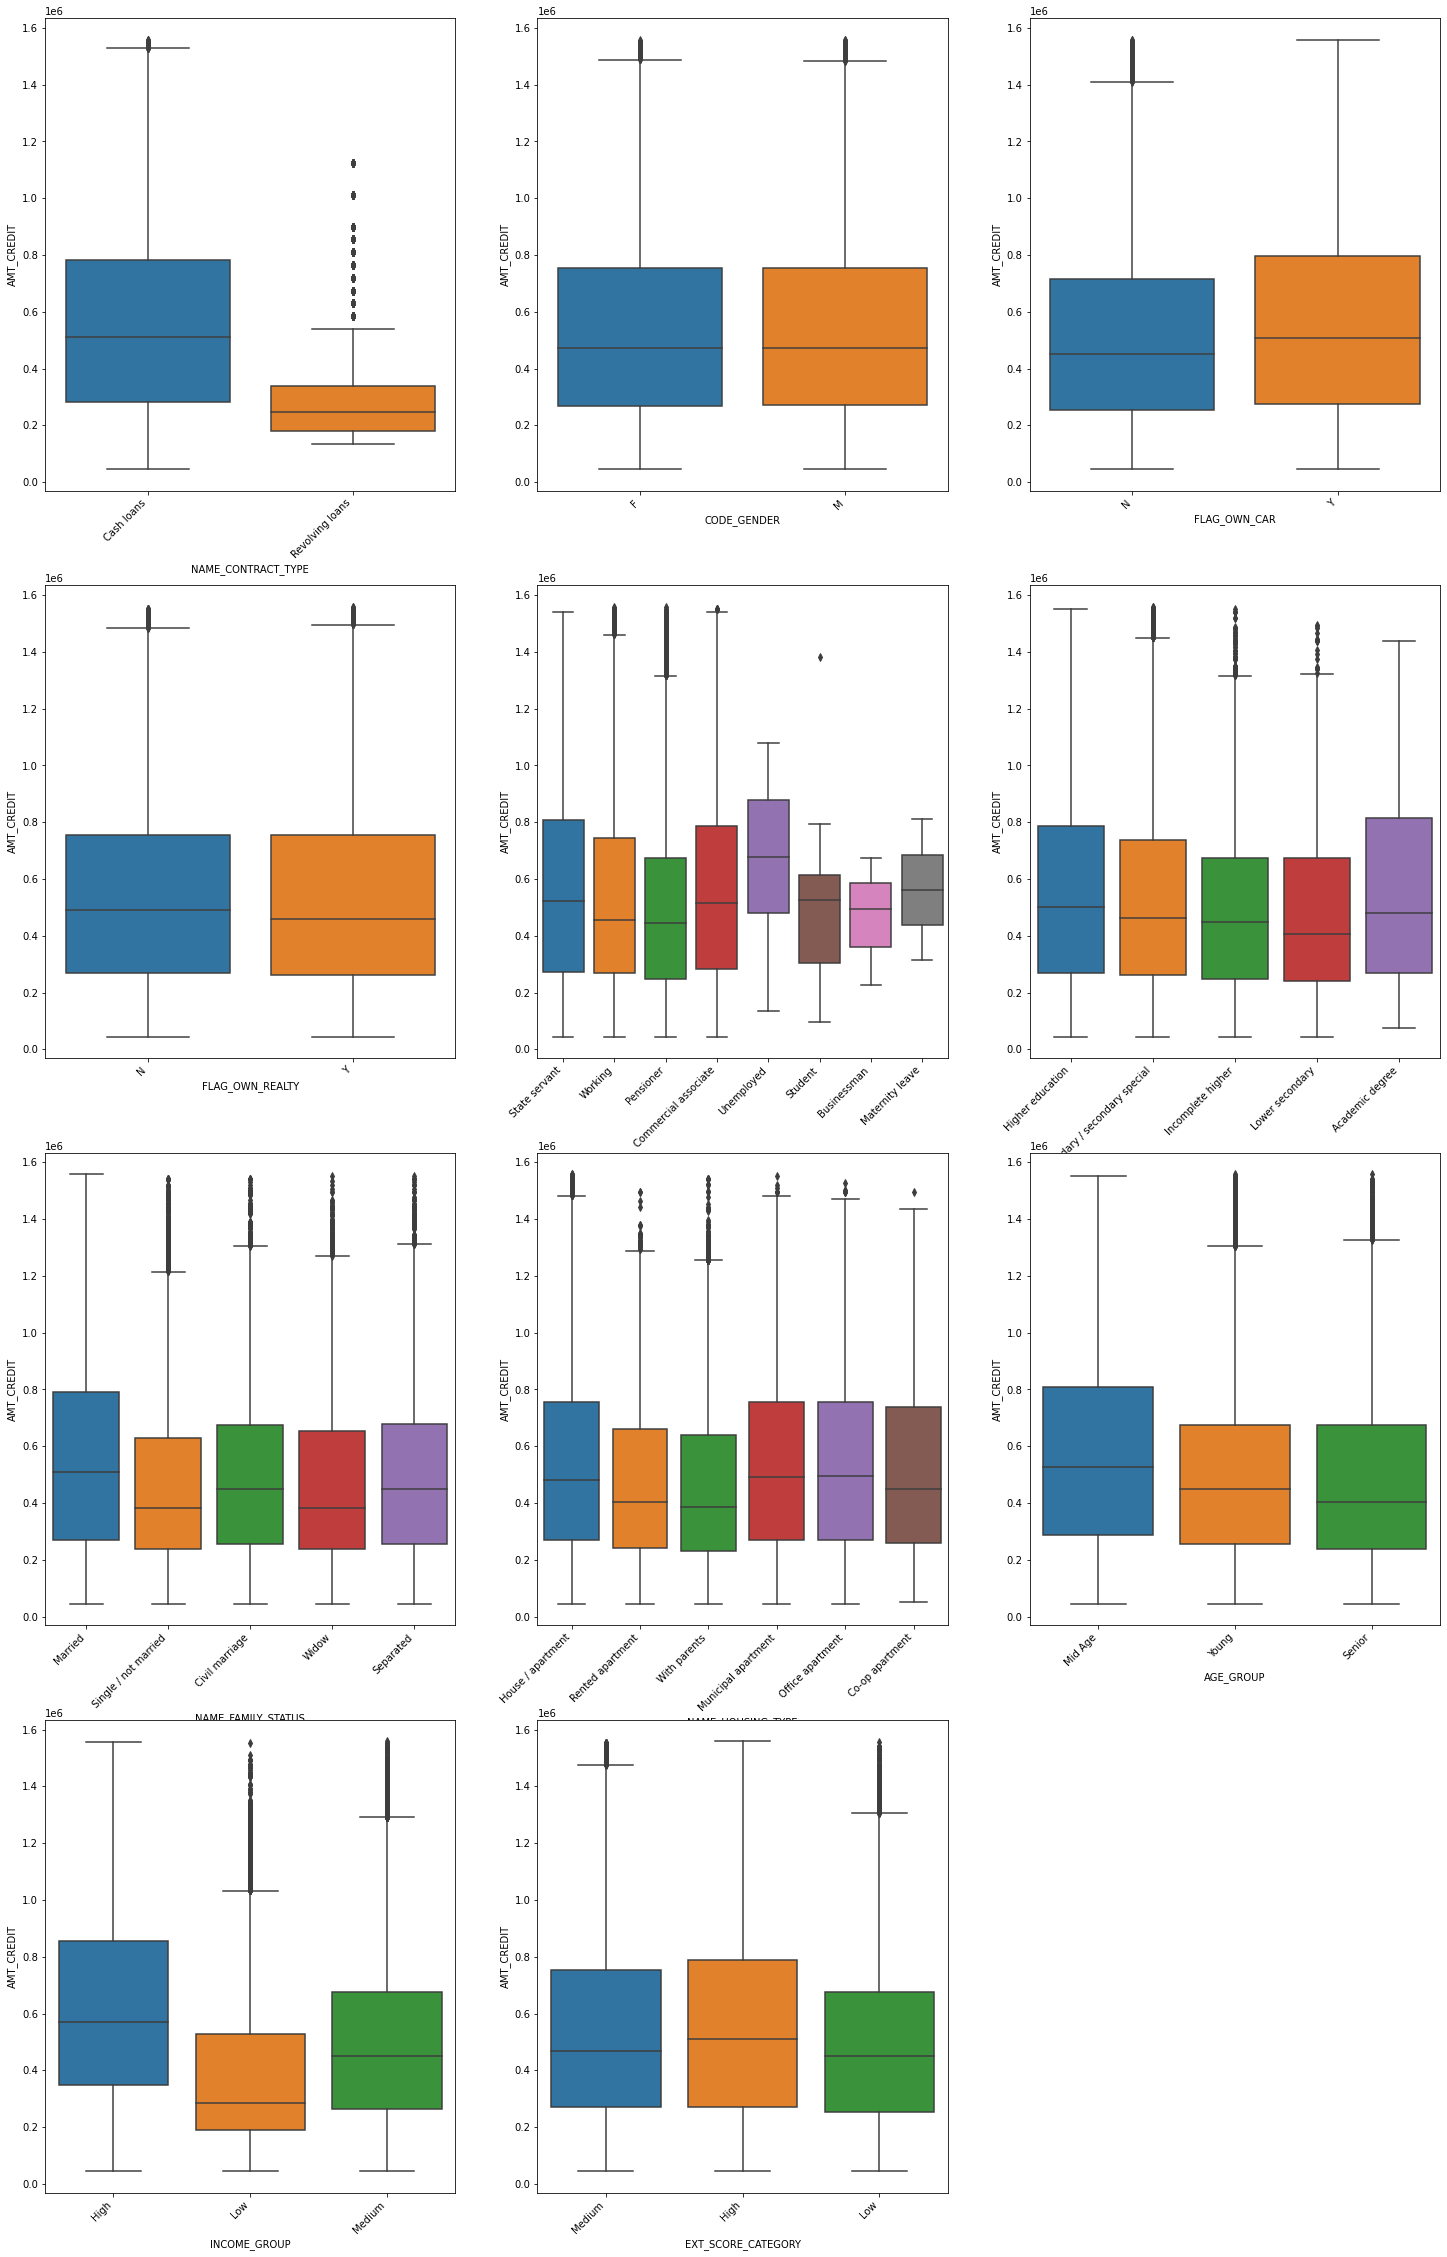

In [90]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = "AMT_CREDIT", data=df_current_target_0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment="right")

Analysis
* Credit amount of the loans are very low for Revolving loans
* There is no credit amount differnce between genders, client owning cars or realty.
* The mid age group got more amount of loan credited cmpared to young and senior citizen.
* Higher income group have more loan amount credited and lower the lowest.
* Clients having higher external score have more loan amount.
* Surprisingly the unemployed people have spike in credit amount of loan
* The Married people have more loan amount credited.

### Anslysis of two segmented variables

Text(0, 0.5, 'Defaulters')

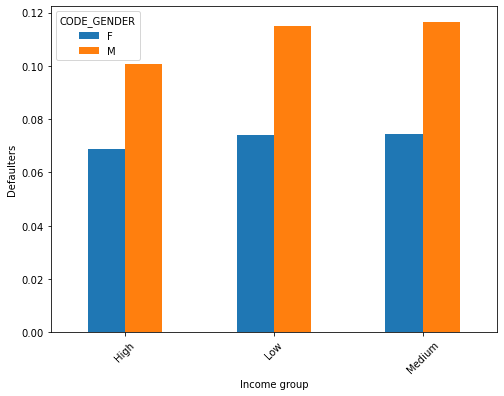

In [91]:
df_current_application.pivot_table(values="TARGET",index="INCOME_GROUP",columns="CODE_GENDER",aggfunc="mean").plot.bar(figsize=(8,6),rot=45)
plt.xlabel("Income group")
plt.ylabel("Defaulters")

Analysis
* We can see that Males are more likely defaulted than Females accross all income groups.

#### Education and gender

Text(0, 0.5, 'Defaulters')

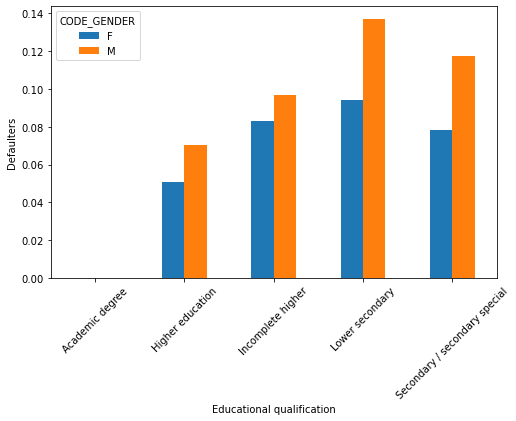

In [92]:
df_current_application.pivot_table(values="TARGET",index="NAME_EDUCATION_TYPE",columns="CODE_GENDER",aggfunc="mean").plot.bar(figsize=(8,5),rot=45)
plt.xlabel("Educational qualification")
plt.ylabel("Defaulters")

Analysis
* Lower secondary educated clients are more defaulted followed by Secondary and Incomplete higher educated clients.
* The Higher educated people are less defaulted.
* Accross all educated level Females are less defaulted than male.

#### Credit amount group and Income group

Text(0, 0.5, 'Defaulters')

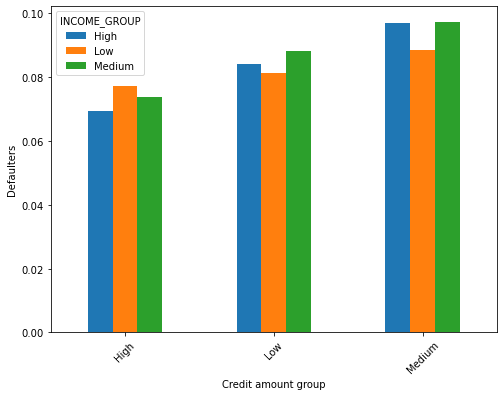

In [93]:
df_current_application.pivot_table(values="TARGET",index="CREDIT_GROUP",columns="INCOME_GROUP",aggfunc="mean").plot.bar(figsize=(8,6),rot=45)
plt.xlabel("Credit amount group")
plt.ylabel("Defaulters")

Analysis
* Medium credit amount group are highly defaulted in all income groups.
* High credit amount groups are less likely to default in all income groups.

#### Credit amount group and Age group

Text(0, 0.5, 'Defaulters')

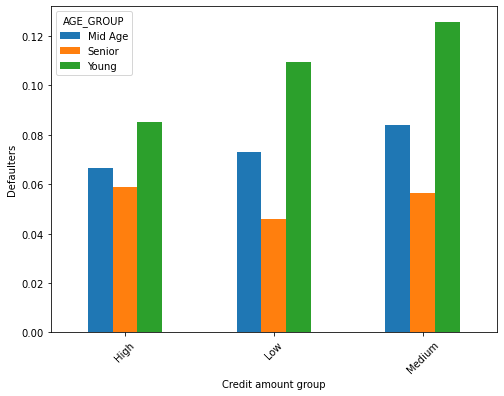

In [94]:
df_current_application.pivot_table(values="TARGET",index="CREDIT_GROUP",columns="AGE_GROUP",aggfunc="mean").plot.bar(figsize=(8,6),rot=45)
plt.xlabel("Credit amount group")
plt.ylabel("Defaulters")

Analysis
* Young clients with medium and low credit amount group are highly defaulted.
* Senior citizens across all credit amount groups are less likely defaulted.

#### Age group and Income group

Text(0, 0.5, 'Defaulters')

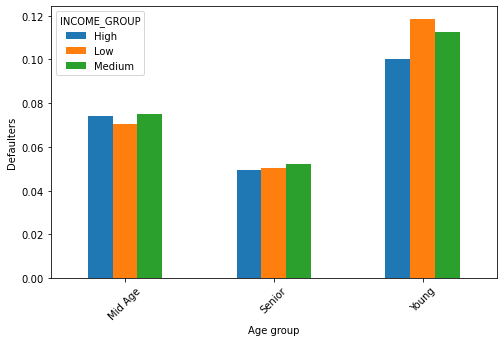

In [95]:
df_current_application.pivot_table(values="TARGET",index="AGE_GROUP",columns="INCOME_GROUP",aggfunc="mean").plot.bar(figsize=(8,5),rot=45)
plt.xlabel("Age group")
plt.ylabel("Defaulters")

Analysis
* Young clients are more defaulted than Mid age and senior.
* Young low income people are more defaulted.
* For Mid age and senior people the default rate is almost same in all income group.

#### Profession and Gender

Text(0, 0.5, 'Defaulters')

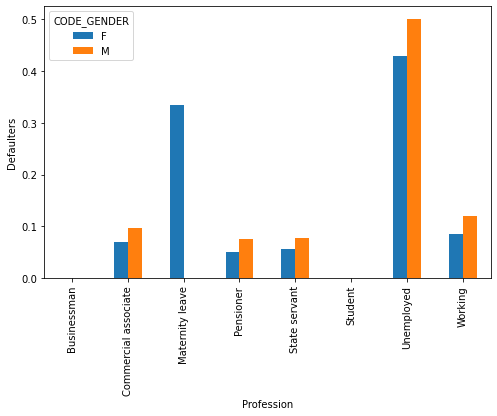

In [96]:
df_current_application.pivot_table(values="TARGET",index="NAME_INCOME_TYPE",columns="CODE_GENDER",aggfunc="mean").plot.bar(figsize=(8,5),rot=90)
plt.xlabel("Profession")
plt.ylabel("Defaulters")

Analysis
* No surprise the unemployed clients are more defaulted.
* Clients with maternity leave are expected to be defaulted more.
* The default rate is lesser in all other professions.
* Males are more defaulted with their respective professions compared to females.

#### Family status and age group

Text(0, 0.5, 'Defaulters')

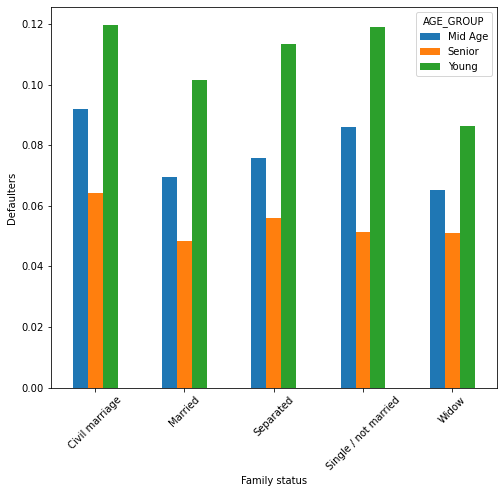

In [97]:
df_current_application.pivot_table(values="TARGET",index="NAME_FAMILY_STATUS",columns="AGE_GROUP",aggfunc="mean").plot.bar(figsize=(8,7),rot=45)
plt.xlabel("Family status")
plt.ylabel("Defaulters")

Analysis
* Across all family status the Young clients are more defaulted and Senior citizen are less.

#### Family status and gender

Text(0, 0.5, 'Defaulters')

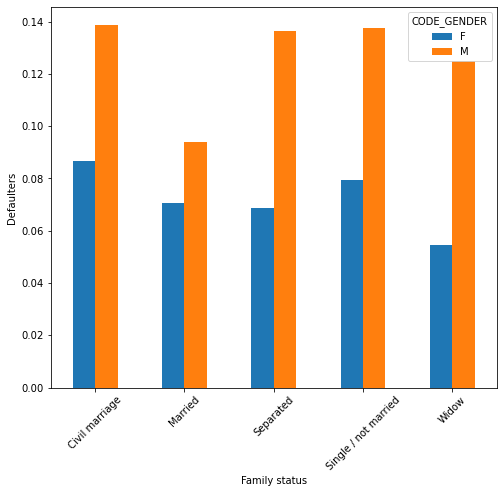

In [98]:
df_current_application.pivot_table(values="TARGET",index="NAME_FAMILY_STATUS",columns="CODE_GENDER",aggfunc="mean").plot.bar(figsize=(8,7),rot=45)
plt.xlabel("Family status")
plt.ylabel("Defaulters")

Analysis
* Across all family status the Male clients are more defaulted than Female.

## Previous application

In [99]:
df_previous_application = pd.read_csv("previous_application.csv")
df_previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [100]:
df_previous_application.shape

(1670214, 37)

In [101]:
df_previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [102]:
df_previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### Handaling missing values in columns

#### Replacing all the XNA and XAP to np.null Because looks like these values entered in the application as blank or may be not applicable.

In [103]:
df_previous_application.replace("XNA",np.nan,inplace=True)
df_previous_application.replace("XAP",np.nan,inplace=True)

In [104]:
### Find the percentage missing values for the columns

In [105]:
# Function for calculating null values
def column_wise_percentage_null_p(df_previous_application):
    output_p = round(100*(df_previous_application.isnull().sum()/len(df_previous_application.index)),2)
    return output_p

In [106]:
# Get percentage missing values of all columns
Na_col_p = column_wise_percentage_null_p(df_previous_application)
Na_col_p

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.02
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         95.83
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE              37.56
CODE_REJECT_REASON             81.33
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.12
NAME_GOODS_CATEGORY            56.93
NAME_PORTFOLIO                 22.29
NAME_PRODUCT_TYPE              63.68
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

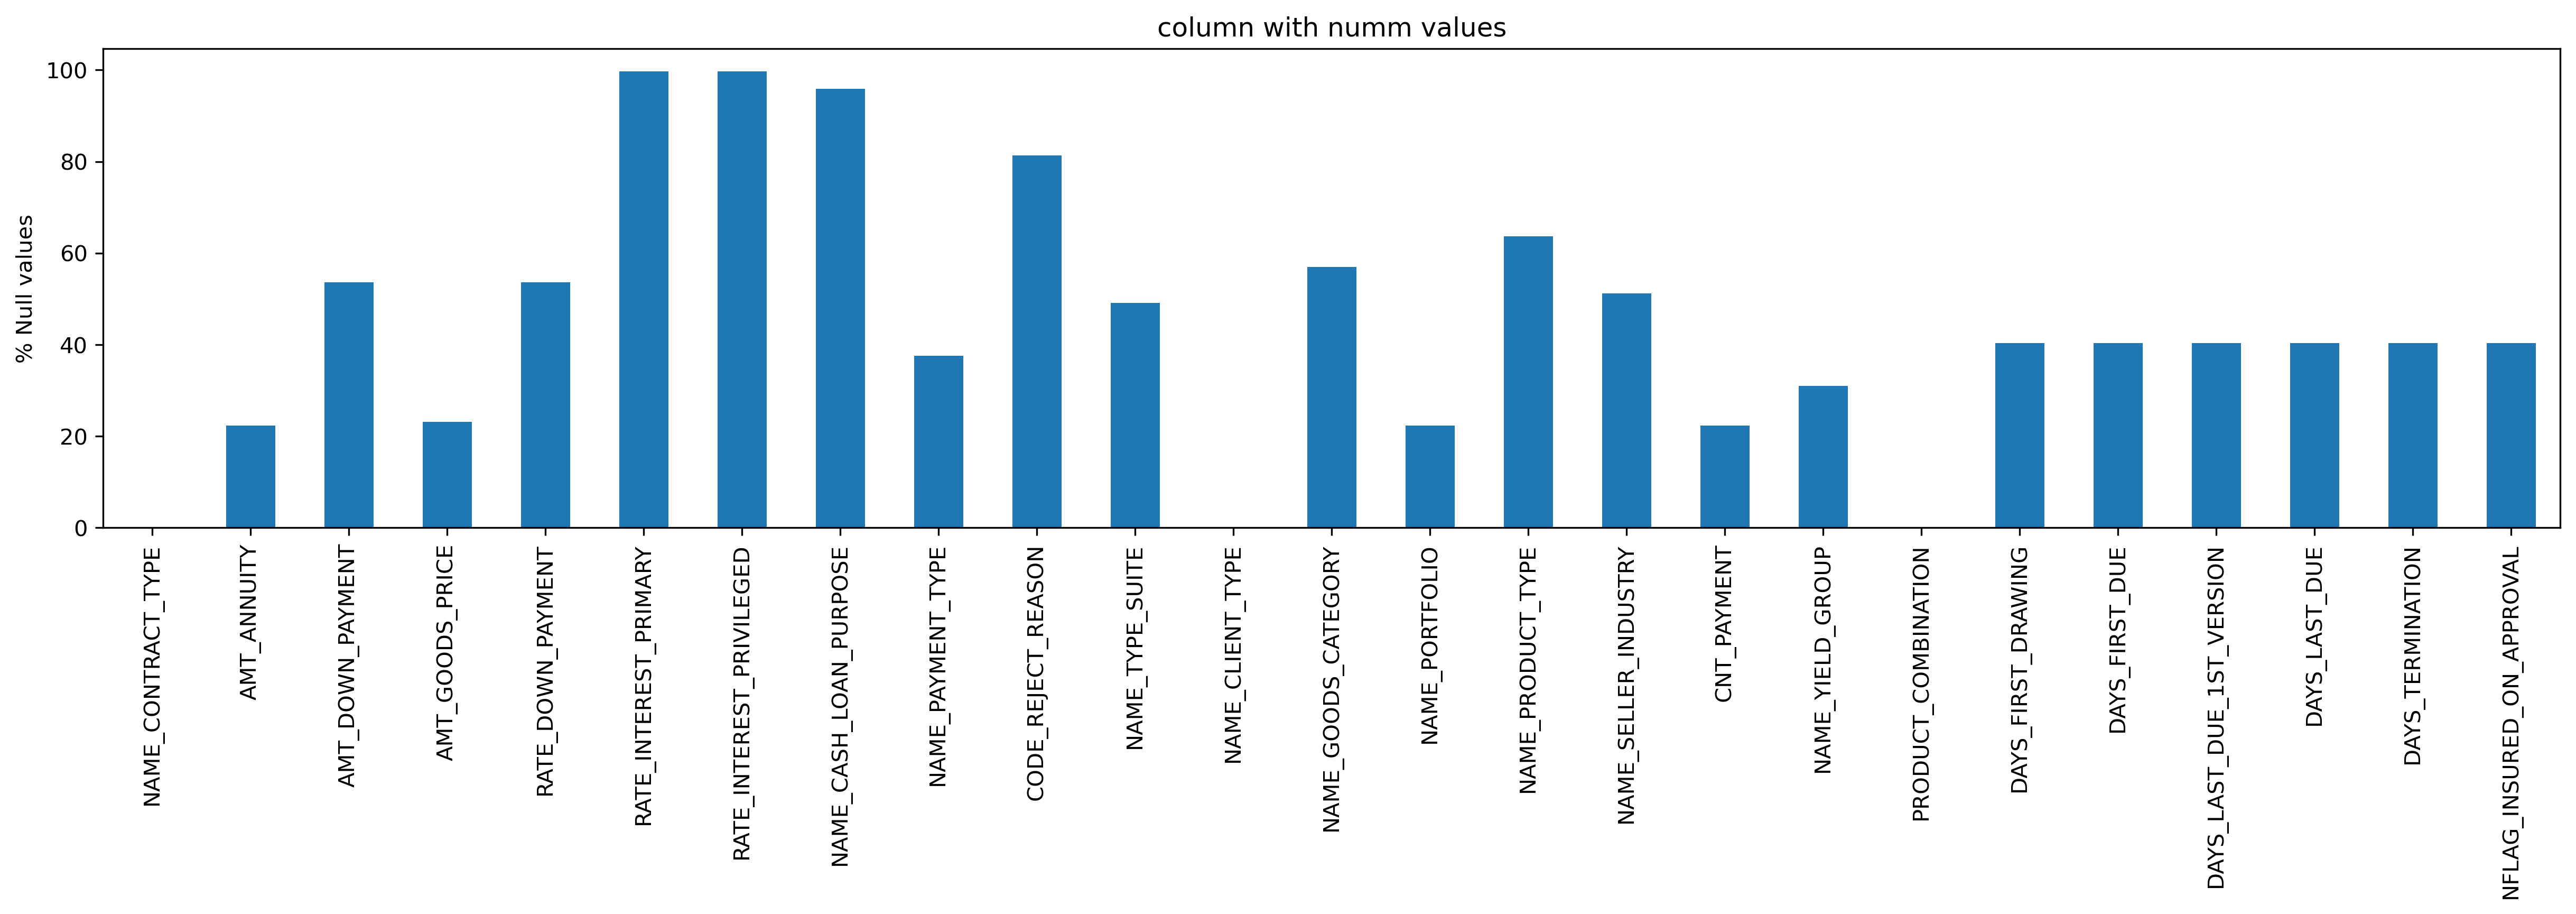

In [107]:
# Identifying the coluns with null values
Na_col_p = Na_col_p[Na_col_p>0]

# Graphical representation of column with their percentage null values
plt.figure(figsize= (20,4), dpi=300)
Na_col_p.plot(kind = "bar")
plt.title("column with numm values")
plt.ylabel("% Null values")
plt.show()

In [108]:
# List the columns having more than 25 percent missing value
cols_25_missing_values_p = Na_col_p[Na_col_p> 25]
cols_25_missing_values_p

AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
NAME_CASH_LOAN_PURPOSE       95.83
NAME_PAYMENT_TYPE            37.56
CODE_REJECT_REASON           81.33
NAME_TYPE_SUITE              49.12
NAME_GOODS_CATEGORY          56.93
NAME_PRODUCT_TYPE            63.68
NAME_SELLER_INDUSTRY         51.23
NAME_YIELD_GROUP             30.97
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

In [109]:
# Deleting the columns having more than 25% missing values
df_previous_application = df_previous_application.drop(cols_25_missing_values_p.index, axis=1)
df_previous_application.shape

(1670214, 19)

##### List and delete the columns, which are not much relevant for the analysis

In [110]:
df_previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [111]:
cols_p_irrelevant = ["HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","WEEKDAY_APPR_PROCESS_START"]

In [112]:
# Delete the columns which are irrelevant for the analysis
df_previous_application = df_previous_application.drop(cols_p_irrelevant,axis=1)

In [113]:
df_previous_application.shape

(1670214, 15)

#### Treating Missing Values in Rows

In [114]:
# Count the number of rows having more than 40% missing values
len(df_previous_application[df_previous_application.isnull().sum(axis=1) > (len(df_previous_application.columns)//1.67)].index)

0

As there are none of the rows, so we are not deleting rows on basis of this

In [115]:
# Percent of missing values in columns
# Get percentage missing values of all columns
Na_col_p = column_wise_percentage_null_p(df_previous_application)
Na_col_p

SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_TYPE       0.02
AMT_ANNUITY             22.29
AMT_APPLICATION          0.00
AMT_CREDIT               0.00
AMT_GOODS_PRICE         23.08
NAME_CONTRACT_STATUS     0.00
DAYS_DECISION            0.00
NAME_CLIENT_TYPE         0.12
NAME_PORTFOLIO          22.29
CHANNEL_TYPE             0.00
SELLERPLACE_AREA         0.00
CNT_PAYMENT             22.29
PRODUCT_COMBINATION      0.02
dtype: float64

In [116]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
len(df_previous_application[np.isnan(df_previous_application["AMT_ANNUITY"]) & np.isnan(df_previous_application["CNT_PAYMENT"]) & np.isnan(df_previous_application["AMT_GOODS_PRICE"])])

333855

As there are only 333855 such records we can delete those. 
* Note:- As we have total 1670214 records deleting only 333855 records will not much affect our further analysis. It is better to delete such rows instead of imputing values and making the analysis biased.

In [117]:
df_previous_application = df_previous_application[(~(np.isnan(df_previous_application["AMT_ANNUITY"]) & np.isnan(df_previous_application["AMT_GOODS_PRICE"]) & np.isnan(df_previous_application["CNT_PAYMENT"])))]
df_previous_application.shape

(1336359, 15)

In [118]:
Na_col_p = column_wise_percentage_null_p(df_previous_application)
Na_col_p

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             2.87
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.87
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          2.87
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             2.87
PRODUCT_COMBINATION     0.00
dtype: float64

In [119]:
# Count the rows for which AMT_ANNUITY is empty
len(df_previous_application[np.isnan(df_previous_application["AMT_ANNUITY"])])

38380

In [120]:
# As there are only 38380 rows we can delte those records
df_previous_application = df_previous_application[~(np.isnan(df_previous_application["AMT_ANNUITY"]))]

In [121]:
Na_col_p = column_wise_percentage_null_p(df_previous_application)
Na_col_p

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             0.00
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.98
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          0.00
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             0.00
PRODUCT_COMBINATION     0.00
dtype: float64

In [122]:
df_previous_application.shape

(1297979, 15)

### Removing outliers

In [123]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","DAYS_DECISION","CNT_PAYMENT"]
for col in col_list_outlier: 
    q1 = df_previous_application[col].quantile(0.25)
    q3 = df_previous_application[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_prev_application = df_previous_application.loc[(df_previous_application[col] > range_low) & (df_previous_application[col] < range_high)]

df_prev_application.shape

(1242076, 15)

In [124]:
# Percentage of rows lost
round((100 - 100*(len(df_prev_application.index)/1670214)),2)

25.63

In our data cleaning excerise we have lost around 25% rows. As this is huge dataset, we still have 1242076 records for analysis.

### Checking data imbalance

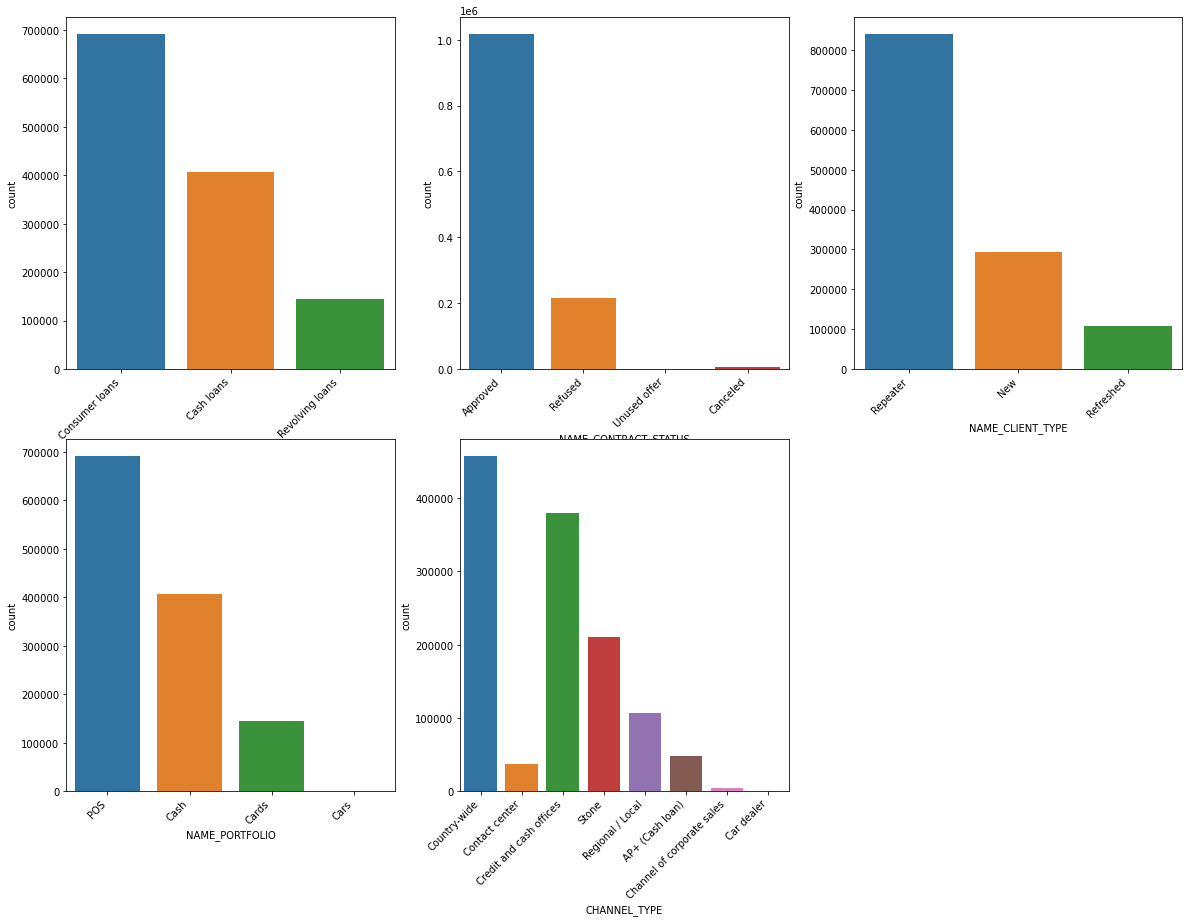

In [125]:
# Listing columns for check data imbalance and plotting them
col_list = ["NAME_CONTRACT_TYPE","NAME_CONTRACT_STATUS","NAME_CLIENT_TYPE","NAME_PORTFOLIO","CHANNEL_TYPE"]            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    ax = sns.countplot(x = col , data = df_prev_application )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment="right")

We can see that there is data imbalance in below columns:-

* NAME_CONTRACT_TYPE - There are veru few Revolving Loans
* NAME_CONTRACT_STATUS - There are very few Refused loans. Almost negligible Canceled loans.
* NAME_CLIENT_TYPE - There are very few New applicant. Even fewer Refreshed applicants.
* NAME_PORTFOLIO - Very few application for Cards and Cars
* CHANNEL_TYPE - Except Country-Wide, Credit and Cash offices and Stone all other channels are very few in muber.

### Converting DAYS_DECISION column into MONTH_DECISION column for readablity and analysis

In [126]:
# Divide "DAYS_DECISION" by 30 for taking MONTH_DECISION
df_prev_application["MONTH_DECISION"] = abs(df_prev_application["DAYS_DECISION"]//30)

In [127]:
# Drop "DAYS_DECISION" column
df_prev_application = df_prev_application.drop(["DAYS_DECISION"],axis=1)
df_prev_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  \
0     17145.0          17145.0             Approved         Repeater   
1    679671.0         607500.0             Approved         Repeater   
2    136444.5         112500.0             Approved         Repeater   
3    470790.0         450000.0             Approved         Repeater   
4    404055.0         337500.0              Refused         Repeater   

  NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT  \
0            POS             Country-wide                35         12.0   
1           Cash           Contact center                -1         36.0   
2           Cash  Credit and cash offices                -1         12.0   
3           Cash  Credit and cash offices                -1         12.0   
4           Cash  Credit and cash offices                -1         24.0   

        PRODUCT_COMBINATION  MONTH_DECISION  
0  POS mobile with interest               3  
1          Cash X-Sell: low               6  
2         Cash X-Sell: high              11  
3       Cash X-Sell: middle              18  
4         Cash Street: high              27

In [128]:
df_prev_application.shape

(1242076, 15)

### Merging Current application and Previous application dataset

In [129]:
# Columns to take from current application dataset
cols_current = ["SK_ID_CURR","TARGET","CODE_GENDER","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","AGE_GROUP","INCOME_GROUP","EXT_SCORE_CATEGORY"]

In [130]:
# Creating a dataset from current application for merging 
df_current_to_merge = df_current_application[cols_current]
df_current_to_merge.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100004       0           M  Secondary / secondary special   
3      100006       0           F  Secondary / secondary special   
4      100007       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS AGE_GROUP INCOME_GROUP EXT_SCORE_CATEGORY  
0  Single / not married     Young         High                Low  
1               Married   Mid Age         High             Medium  
2  Single / not married   Mid Age          Low               High  
3        Civil marriage   Mid Age       Medium             Medium  
4  Single / not married   Mid Age       Medium             Medium

In [131]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ["SELLERPLACE_AREA","PRODUCT_COMBINATION","AMT_GOODS_PRICE"]

In [132]:
# Creating  a dataset from previous application for merging
df_prev_to_merge = df_prev_application.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
3    470790.0             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  
0             Country-wide         12.0               3  
1           Contact center         36.0               6  
2  Credit and cash offices         12.0              11  
3  Credit and cash offices         12.0              18  
4  Credit and cash offices         24.0              27

In [133]:
# Merging both the datasets
df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on="SK_ID_CURR", how="left")
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
3    470790.0             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3     0.0           F   
1           Contact center         36.0               6     0.0           F   
2  Credit and cash offices         12.0              11     0.0           F   
3  Credit and cash offices         12.0              18     NaN         NaN   
4  Credit and cash offices         24.0              27     0.0           F   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS AGE_GROUP INCOME_GROUP  \
0              Incomplete higher            Married   Mid Age         High   
1  Secondary / secondary special     Civil marriage   Mid Age          Low   
2  Secondary / secondary special            Married     Young          Low   
3                            NaN                NaN       NaN          NaN   
4  Secondary / secondary special            Married     Young         High   

  EXT_SCORE_CATEGORY  
0               High  
1             Medium  
2                Low  
3                NaN  
4             Medium

In [134]:
df_merged.shape

(1242076, 19)

In [135]:
len(df_merged[np.isnan(df_merged["TARGET"])])

286969

We can see that there are NaN values in the current application columns in the merged datasets. Because few SK_ID_CURR are present in the previous application dataset, but those IDs are not present in the current application dataset. Eg:- SK_ID_CURR == 176158 is present in the previous application but not in present. We will remove those such records.

In [136]:
df_merged = df_merged[(~(np.isnan(df_merged["TARGET"])))] 

# Converting TARGET column from float64 to Int64
df_merged["TARGET"] = df_merged["TARGET"].astype("int64")

df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   
5    340573.5             Approved         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3       0           F   
1           Contact center         36.0               6       0           F   
2  Credit and cash offices         12.0              11       0           F   
4  Credit and cash offices         24.0              27       0           F   
5  Credit and cash offices         18.0              23       0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS AGE_GROUP INCOME_GROUP  \
0              Incomplete higher            Married   Mid Age         High   
1  Secondary / secondary special     Civil marriage   Mid Age          Low   
2  Secondary / secondary special            Married     Young          Low   
4  Secondary / secondary special            Married     Young         High   
5  Secondary / secondary special     Civil marriage   Mid Age         High   

  EXT_SCORE_CATEGORY  
0               High  
1             Medium  
2                Low  
4             Medium  
5             Medium

We can create a new derived column for what percentage of the applied amount was credited for each client. Derived column name :- PERCENT_CREDIT

In [137]:
df_merged["PERCENT_CREDIT"] = round(((df_merged["AMT_CREDIT"]/df_merged["AMT_APPLICATION"])*100),2)
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   
5    340573.5             Approved         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3       0           F   
1           Contact center         36.0               6       0           F   
2  Credit and cash offices         12.0              11       0           F   
4  Credit and cash offices         24.0              27       0           F   
5  Credit and cash offices         18.0              23       0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS AGE_GROUP INCOME_GROUP  \
0              Incomplete higher            Married   Mid Age         High   
1  Secondary / secondary special     Civil marriage   Mid Age          Low   
2  Secondary / secondary special            Married     Young          Low   
4  Secondary / secondary special            Married     Young         High   
5  Secondary / secondary special     Civil marriage   Mid Age         High   

  EXT_SCORE_CATEGORY  PERCENT_CREDIT  
0               High          100.00  
1             Medium          111.88  
2                Low          121.28  
4             Medium          119.72  
5             Medium          108.12

### Univariate analysis on unordered categorical variable

#### Previous Loan status

[Text(0.5, 0, 'Loan status')]

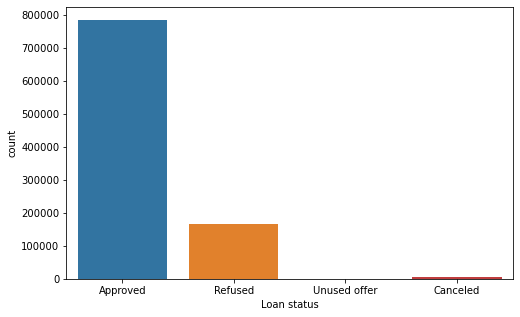

In [138]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = "NAME_CONTRACT_STATUS",data=df_merged)
ax.set(xlabel="Loan status")

Analysis
* There are huge number of Approved loan than Refused. Hardly, there are any Canceled or Unused offer loan.

#### Client type

[Text(0.5, 0, 'Client type')]

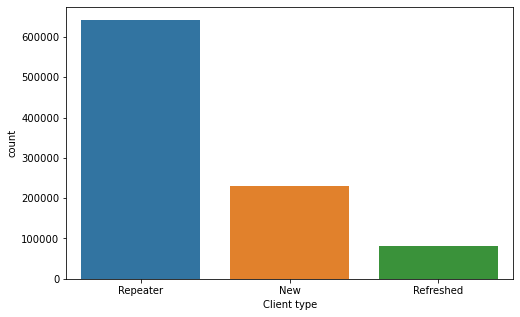

In [139]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = "NAME_CLIENT_TYPE",data=df_merged)
ax.set(xlabel="Client type")

Analysis
* Mostly the applicants were Repeater

#### Portfolio of the previous applications

[Text(0.5, 0, 'Portfolio')]

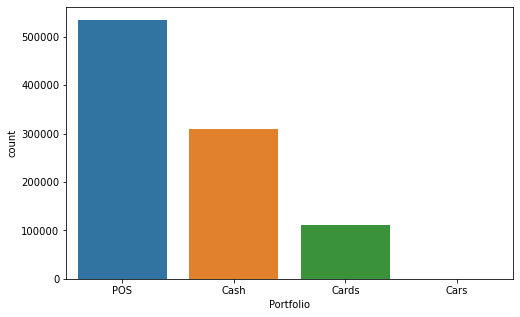

In [140]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = "NAME_PORTFOLIO",data=df_merged)
ax.set(xlabel="Portfolio")

Analysis
* The highest number of the previous applications was for POS. Applications for Cash also has good number. Applications for Cards were very few.

#### Application channel type

[Text(0.5, 0, 'Application channel')]

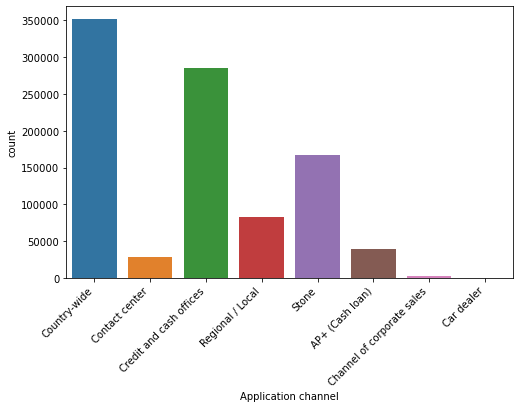

In [141]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = "CHANNEL_TYPE",data=df_merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment="right")
ax.set(xlabel="Application channel")

Analysis
* We see that Country-wide was heavily used for previous applications followed by Credit and Cash offices, Stone and Regional. Rest other channels are hardly used.

### Univariate analysis for continious variables

#### Applied loan amount

[Text(0.5, 0, 'Application amount')]

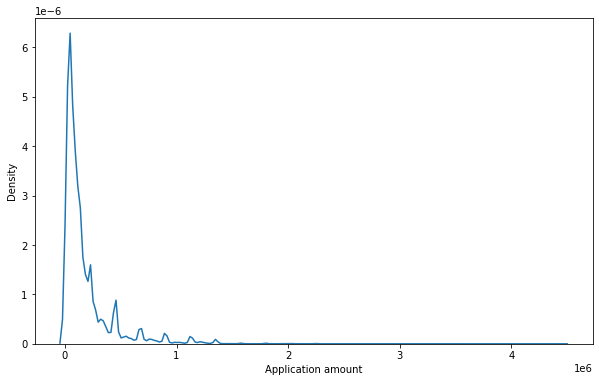

In [142]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged["AMT_APPLICATION"],hist=False)
ax.set(xlabel="Application amount")

Analysis
* Most of the applications were for the amount of below 250000 as we see from the above distributio

#### Months took for the pervious application decision relative to the current application

[Text(0.5, 0, 'Months')]

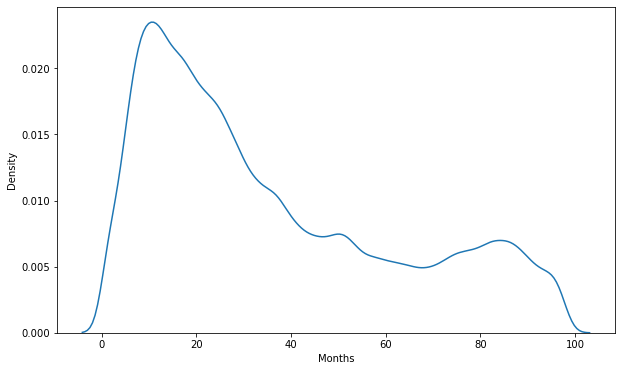

In [143]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged["MONTH_DECISION"],hist=False)
ax.set(xlabel="Months")

Analysis
* We can see that most of the applications decision took approximately 30 months. The time taken spread upto 100 months.

### Bivariate analysis

#### Corelation of relevant numerical columns

In [144]:
# Listing the relevant columns for finding corelation
corr_cols = ["AMT_APPLICATION","AMT_CREDIT","AMT_ANNUITY","PERCENT_CREDIT","CNT_PAYMENT","MONTH_DECISION"]

In [145]:
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  PERCENT_CREDIT  CNT_PAYMENT  \
0          17145.0     17145.0     1730.430          100.00         12.0   
1         607500.0    679671.0    25188.615          111.88         36.0   
2         112500.0    136444.5    15060.735          121.28         12.0   
4         337500.0    404055.0    31924.395          119.72         24.0   
5         315000.0    340573.5    23703.930          108.12         18.0   

   MONTH_DECISION  
0               3  
1               6  
2              11  
4              27  
5              23

In [146]:
# Corelation matrix
df_merged_corr.corr()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  PERCENT_CREDIT  \
AMT_APPLICATION         1.000000    0.953389     0.830663        0.179395   
AMT_CREDIT              0.953389    1.000000     0.847825        0.261587   
AMT_ANNUITY             0.830663    0.847825     1.000000        0.200139   
PERCENT_CREDIT          0.179395    0.261587     0.200139        1.000000   
CNT_PAYMENT             0.592375    0.567978     0.352648        0.391865   
MONTH_DECISION         -0.288808   -0.293229    -0.269146       -0.264627   

                 CNT_PAYMENT  MONTH_DECISION  
AMT_APPLICATION     0.592375       -0.288808  
AMT_CREDIT          0.567978       -0.293229  
AMT_ANNUITY         0.352648       -0.269146  
PERCENT_CREDIT      0.391865       -0.264627  
CNT_PAYMENT         1.000000       -0.197025  
MONTH_DECISION     -0.197025        1.000000

<AxesSubplot:>

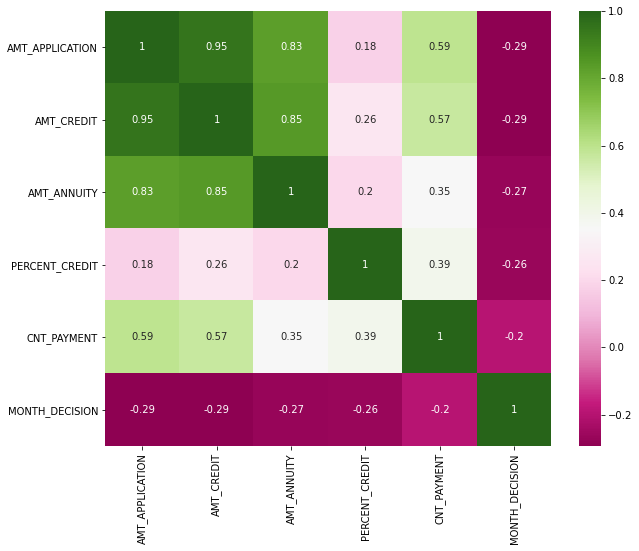

In [147]:
plt.figure(figsize=(10,8))
sns.heatmap(df_merged_corr.corr(),cmap="PiYG",annot=True)

Highly corelate columns

* AMT_APPLICATION and AMT_CREDIT
* AMT_APPLICATION and AMT_ANNUITY
* AMT_CREDIT and AMT_ANNUITY

Moderately corelated columns

* AMT_APPLICATION and CNT_PAYMENT
* AMT_CREDIT and CNT_PAYMENT

### Bivariate analysis on continious variable

#### Application amount and credited amount

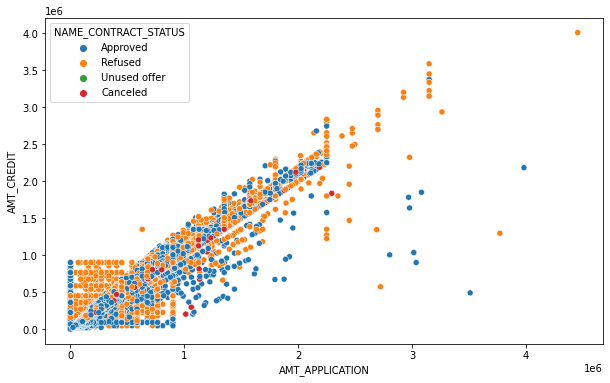

In [148]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot("AMT_APPLICATION","AMT_CREDIT",hue="NAME_CONTRACT_STATUS", data=df_merged)

Analysis
* We can see that the applications are more concentrated on the lesser amount and so as the credited amount. Also, the credited amount is increased with respect to the application amount.

#### Application amount and the month taken to take decision related to current application

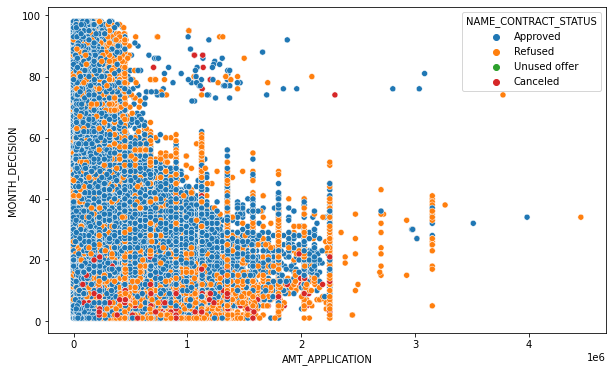

In [149]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot("AMT_APPLICATION","MONTH_DECISION",hue="NAME_CONTRACT_STATUS", data=df_merged)

Analysis
* We can see a pattern here that the more the application amount of the loan, the lesser the months taken prior to current application. That means, most of the higher amount of the loan application decision made in the recent time comapred to the lower loan amount application.

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

In [150]:
# Category list
categories = ["NAME_CONTRACT_TYPE","NAME_CLIENT_TYPE","NAME_PORTFOLIO","CHANNEL_TYPE"]

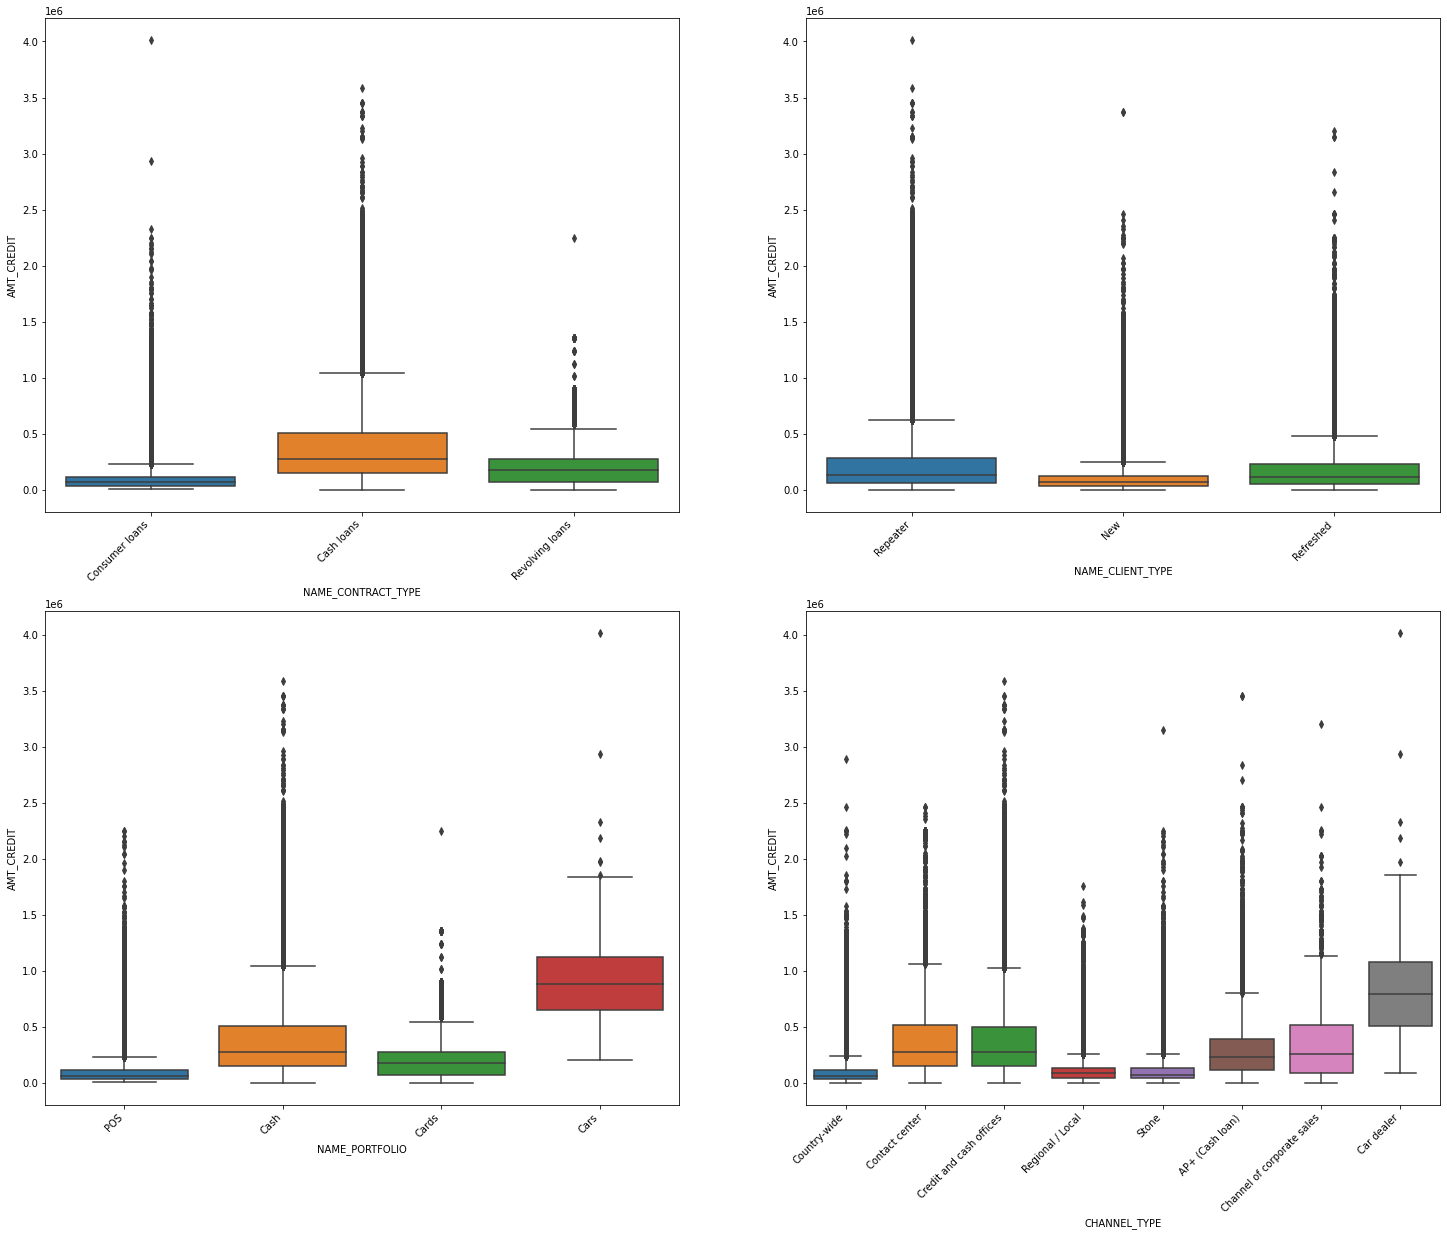

In [151]:
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = "AMT_CREDIT", data=df_merged)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment="right")

Analysis
* Cash loans are more credited in amount than Revolving and Consumer loans.
* Repeater clients get more amount loan than new and refreshed clients.
* The loan with portfolio Cars are more amount credited followed by Cash.
* The credit amount of the loan is more from the application channel type as car dealer followed by Channel of corporate sales, Credit and cash offices and Contact center. The amount is very less for Regional, Stone and Country-wide channels.

### Analysis of two segmented variables

#### Status and Client type

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

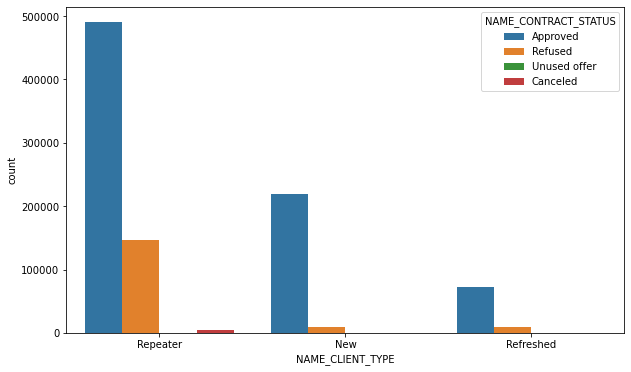

In [152]:
plt.figure(figsize=(10,6))

sns.countplot(x = "NAME_CLIENT_TYPE" ,hue = "NAME_CONTRACT_STATUS", data = df_merged )

Analysis
* We see that the Repeater clients have more approved loans than New and Refreshed clients

#### Current loan defaulter status with respect to previous loan application status

Text(0, 0.5, 'Current defaulters')

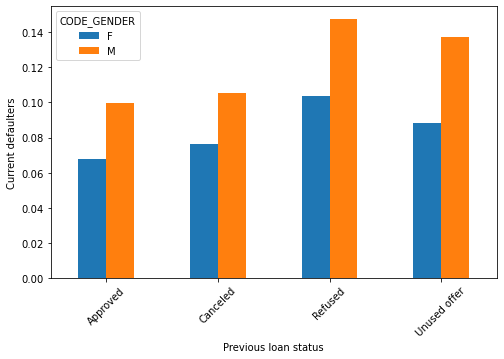

In [153]:
df_merged.pivot_table(values="TARGET",index="NAME_CONTRACT_STATUS",columns="CODE_GENDER",aggfunc="mean").plot.bar(figsize=(8,5),rot=45)
plt.xlabel("Previous loan status")
plt.ylabel("Current defaulters")

Analysis
* We see that previously Refused client is more defaulted than previously Approved clients. Also, in all the cases the Males are more defaulted than Females.

#### Current loan defaulter status with respect to previous loan application status and client types

Text(0, 0.5, 'Current defaulters')

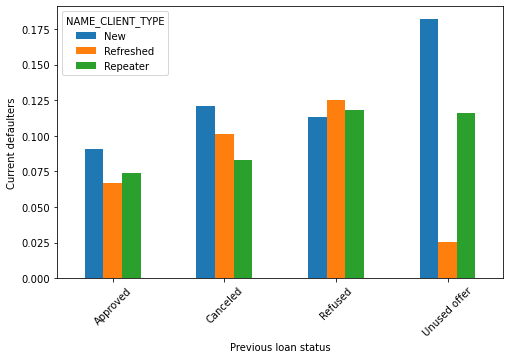

In [154]:
df_merged.pivot_table(values="TARGET",index="NAME_CONTRACT_STATUS",columns="NAME_CLIENT_TYPE",aggfunc="mean").plot.bar(figsize=(8,5),rot=45)
plt.xlabel("Previous loan status")
plt.ylabel("Current defaulters")

Analysis
* We can see that the Defaulters are more for previously Unused offers loan status clients, who were New.
* For previously Approved status the New clients were more defaulted followed by Repeater.
* For previously Refused applicants the Defaulters are more Refreshed clients.
* For previously Canceled applicants the Defaulters are more New clients.

#### Current loan defaulter status with respect to previous loan application status and age group

Text(0, 0.5, 'Current defaulters')

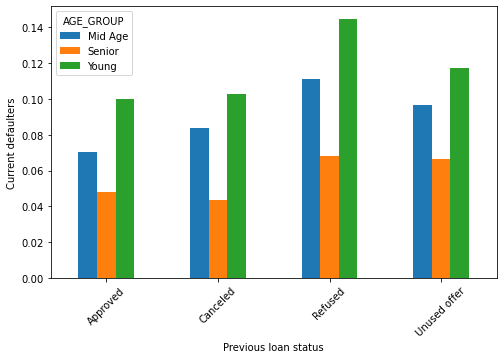

In [155]:
df_merged.pivot_table(values="TARGET",index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",aggfunc="mean").plot.bar(figsize=(8,5),rot=45)
plt.xlabel("Previous loan status")
plt.ylabel("Current defaulters")

Analysis
* For all the previous status Young applicants are more defaulted.
* For all the previous status Senior applicants are less defaulted compared to others.

#### Current loan defaulter status with respect to previous loan application status and income group

Text(0, 0.5, 'Current defaulters')

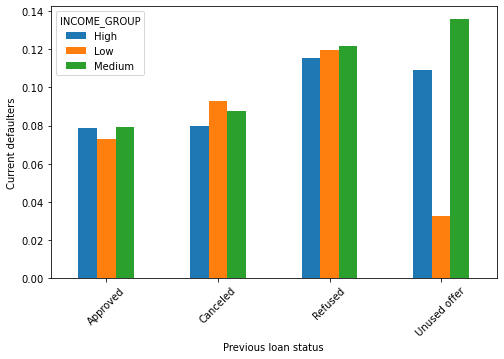

In [156]:
df_merged.pivot_table(values="TARGET",index="NAME_CONTRACT_STATUS",columns="INCOME_GROUP",aggfunc="mean").plot.bar(figsize=(8,5),rot=45)
plt.xlabel("Previous loan status")
plt.ylabel("Current defaulters")

Analysis
* For previously Unused offer the Medium income group was more defaulted and Low income group is the least.
* For other application status more or less all the income groups are equally defaulted.

#### Current loan defaulter status with respect to previous loan application status and portfolio of the loan

Text(0, 0.5, 'Current defaulters')

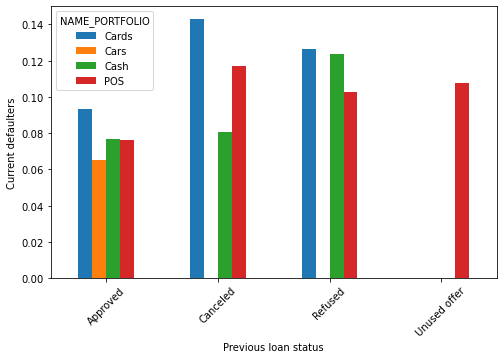

In [157]:
df_merged.pivot_table(values="TARGET",index="NAME_CONTRACT_STATUS",columns="NAME_PORTFOLIO",aggfunc="mean").plot.bar(figsize=(8,5),rot=45)
plt.xlabel("Previous loan status")
plt.ylabel("Current defaulters")

Analysis
* Most of the clients were defaulted, who previously applied loan for Cards.
* For approved loan status the clients applied for Cars are less defaulted.
* For Refused loan status the clients applied for POS are less defaulted.

#### Current loan defaulter status with respect to previous loan application status and external source score category

Text(0, 0.5, 'Current defaulters')

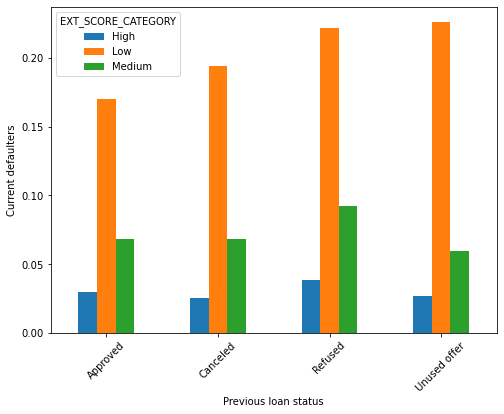

In [158]:
df_merged.pivot_table(values="TARGET",index="NAME_CONTRACT_STATUS",columns="EXT_SCORE_CATEGORY",aggfunc="mean").plot.bar(figsize=(8,6),rot=45)
plt.xlabel("Previous loan status")
plt.ylabel("Current defaulters")

Analysis
* Applicants with low external source score are highly defaulted.
* Higher scorer applicants are very ulikely to default irrespective of their previous loan status.